# LIBRERIAS

In [12]:
%pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import Dropdown, HTML, Text, VBox, HBox, Layout
from IPython.display import display
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import optuna
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import make_scorer, root_mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import os, json, joblib, sys, platform
from datetime import datetime
from sklearn.model_selection import learning_curve
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.base import clone
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import KFold
from scipy.stats import spearmanr

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.inspection import permutation_importance
from sklearn.base import clone

import optuna
from optuna.samplers import TPESampler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
import joblib, os, time
import numpy as np
import pandas as pd

import streamlit as st

In [14]:
import sys
print("Kernel Python:", sys.executable)

# instala/actualiza pip y xgboost en ESTE kernel
!{sys.executable} -m pip install -U pip
!{sys.executable} -m pip install -U xgboost

# verifica
!{sys.executable} -m pip show xgboost

Kernel Python: c:\Users\USUARIO\anaconda3\python.exe
Name: xgboost
Version: 3.0.4
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: c:\Users\USUARIO\anaconda3\Lib\site-packages
Requires: numpy, scipy
Required-by: 


In [15]:
import importlib, diccionario
importlib.reload(diccionario)  # por si quedó en caché

print('¿Está diccionario_variables?:', hasattr(diccionario, 'diccionario_variables'))
print([n for n in dir(diccionario) if not n.startswith('_')][:20])

¿Está diccionario_variables?: True
['HOJA', 'Path', 'XLSX', 'c_amar', 'c_def', 'c_naranja', 'c_param', 'c_ref', 'c_rel', 'c_rojo', 'c_verde', 'cargar_diccionario', 'code', 'col_like', 'df', 'diccionario_variables', 'math', 'pd', 're', 'reglas_por_parametro']


In [16]:
import importlib, diccionario
importlib.reload(diccionario)
len(diccionario.diccionario_variables), len(diccionario.reglas_por_parametro)


(53, 53)

In [17]:
df = pd.read_csv('Copia de Calidad_del_agua_del_Rio_Cauca.csv', sep=';')

df.head()

,FECHA DE MUESTREO,ESTACIONES,pH,TEMPERATURA (°C),COLOR (UPC),TURBIEDAD (UNT),SOLIDOS TOTALES (mg SST/l),SOLIDOS SUSPENDIDOS TOTALES (mg SS/l),SOLIDOS DISUELTOS (mg SD/l),DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),...,CROMO TOTAL (mg Cr/l),CROMO DISUELTO (mg Cr/l),NIQUEL TOTAL (mg Ni/l),NIQUEL DISUELTO (mg Ni/l),PLOMO TOTAL (mg Pb/l),PLOMO DISUELTO (mg Pb/l),MERCURIO (µg Hg/l),COLIFORMES TOTALES (NMP/100 ml),COLIFORMES FECALES (NMP/100 ml),CAUDAL (m3/s)
0,12/19/1998 12:00:00 AM,YOTOCO,"7,1","4,1",NaN,"4,1",NaN,110,NaN,"4,2",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12/19/1998 12:00:00 AM,MEDIACANOA,7,2,NaN,2,NaN,130,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12/19/1998 12:00:00 AM,PASO DE LA TORRE,7,"22,9",NaN,"3,4",NaN,"153,3",NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5/09/1990 0:00,ANTES SUAREZ,"6,6",NaN,NaN,NaN,157,"29,3","127,7","0,5",...,NaN,NaN,0,NaN,NaN,NaN,NaN,"2,4*10E4",23,NaN
4,1/10/1990 0:00,ANTES RIO OVEJAS,"6,7",NaN,NaN,NaN,143,65,78,"2,1",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,4*10E4",24*10E4,NaN


In [18]:
df_sin_columnas = df.drop(columns=['FECHA DE MUESTREO', 'ESTACIONES'])
df_sin_columnas.head()

,pH,TEMPERATURA (°C),COLOR (UPC),TURBIEDAD (UNT),SOLIDOS TOTALES (mg SST/l),SOLIDOS SUSPENDIDOS TOTALES (mg SS/l),SOLIDOS DISUELTOS (mg SD/l),DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),DEMANDA QUIMICA DE OXIGENO (mg O2/l),OXIGENO DISUELTO (mg O2/l),...,CROMO TOTAL (mg Cr/l),CROMO DISUELTO (mg Cr/l),NIQUEL TOTAL (mg Ni/l),NIQUEL DISUELTO (mg Ni/l),PLOMO TOTAL (mg Pb/l),PLOMO DISUELTO (mg Pb/l),MERCURIO (µg Hg/l),COLIFORMES TOTALES (NMP/100 ml),COLIFORMES FECALES (NMP/100 ml),CAUDAL (m3/s)
0,"7,1","4,1",NaN,"4,1",NaN,110,NaN,"4,2",NaN,"1,5",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,2,NaN,2,NaN,130,NaN,3,NaN,"1,81",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,"22,9",NaN,"3,4",NaN,"153,3",NaN,5,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"6,6",NaN,NaN,NaN,157,"29,3","127,7","0,5","5,2","5,6",...,NaN,NaN,0,NaN,NaN,NaN,NaN,"2,4*10E4",23,NaN
4,"6,7",NaN,NaN,NaN,143,65,78,"2,1",24,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,4*10E4",24*10E4,NaN


In [19]:
# Visor de diccionario (Excel)

import math, re
import pandas as pd
from ipywidgets import Text, Dropdown, HTML, VBox, HBox, Layout
from IPython.display import display

# parseo de rangos con inclusividad
def _parse_bands(cell: str):
    """
    Devuelve lista de dicts con límites e inclusividad.
    Soporta: 'a - b' (ambos inclusivos), '> a', '≥ a', '< a', '≤ a'.
    Ej:
      '121 - 180' -> {'lo':121,'hi':180,'lo_inc':True,'hi_inc':True}
      '> 180'     -> {'lo':180,'hi':+inf,'lo_inc':False,'hi_inc':False}
      '≤ 50'      -> {'lo':-inf,'hi':50,'lo_inc':False,'hi_inc':True}
    """
    if not isinstance(cell, str):
        return []
    t = cell.strip().lower()
    if "no aplica" in t or "varía" in t or "varia" in t:
        return []

    out = []
    for part in re.split(r"[;,/]| o ", t):
        s = part.strip()
        if not s:
            continue

        # a - b  (interpretar como inclusivo en ambos extremos)
        m = re.match(r"^\s*(-?\d+(?:\.\d+)?)\s*[-–]\s*(-?\d+(?:\.\d+)?)\s*$", s)
        if m:
            a, b = float(m.group(1)), float(m.group(2))
            if b < a:
                a, b = b, a
            out.append(dict(lo=a, hi=b, lo_inc=True, hi_inc=True))
            continue

        # ≥ a  /  > a
        m = re.match(r"^\s*(≥|>)\s*(-?\d+(?:\.\d+)?)\s*$", s)
        if m:
            op, a = m.group(1), float(m.group(2))
            out.append(dict(lo=a, hi=math.inf, lo_inc=(op == "≥"), hi_inc=False))
            continue

        # ≤ a  /  < a
        m = re.match(r"^\s*(≤|<)\s*(-?\d+(?:\.\d+)?)\s*$", s)
        if m:
            op, a = m.group(1), float(m.group(2))
            out.append(dict(lo=-math.inf, hi=a, lo_inc=False, hi_inc=(op == "≤")))
            continue

    return out

def _fmt_rango(b):
    """Formatea un rango con paréntesis/brackets según inclusividad."""
    li = "[" if b["lo_inc"] else "("
    ri = "]" if b["hi_inc"] else ")"
    lo = "-∞" if b["lo"] == -math.inf else f"{b['lo']:g}"
    hi = "+∞" if b["hi"] ==  math.inf else f"{b['hi']:g}"
    return f"{li}{lo}, {hi}{ri}"

# Carga del diccionario desde Excel
def cargar_diccionario(path="diccionario.xlsx", hoja="Hoja1"):
    df = pd.read_excel(path, sheet_name=hoja)

    # localizar columnas por nombre aproximado
    col_param   = [c for c in df.columns if ("parámetro" in c.lower() or "parametro" in c.lower())][0]
    col_def     = [c for c in df.columns if ("definición" in c.lower() or "definicion" in c.lower())][0]
    col_rel     = [c for c in df.columns if ("relación"  in c.lower() or "relacion"  in c.lower())][0]
    col_ref     = [c for c in df.columns if "referencia" in c.lower()][0]

    # columnas de color (si existen en la hoja)
    col_verde   = next((c for c in df.columns if "verde"   in c.lower()), None)
    col_amar    = next((c for c in df.columns if "amarill" in c.lower()), None)
    col_naranja = next((c for c in df.columns if "naranja" in c.lower()), None)
    col_rojo    = next((c for c in df.columns if "rojo"    in c.lower()), None)

    diccionario_variables = {}
    reglas_por_parametro  = {}

    for _, r in df.iterrows():
        nombre = str(r[col_param]).strip()
        if not nombre or nombre.lower() == "nan":
            continue

        diccionario_variables[nombre] = {
            "definicion": r.get(col_def, ""),
            "relacion_contaminacion": r.get(col_rel, ""),
            "referencia": r.get(col_ref, "")
        }

        # si hay columnas de color, parsear rangos
        if all([col_verde, col_amar, col_naranja, col_rojo]):
            reglas_por_parametro[nombre] = {
                "V": _parse_bands(str(r.get(col_verde, ""))),
                "A": _parse_bands(str(r.get(col_amar, ""))),
                "N": _parse_bands(str(r.get(col_naranja, ""))),
                "R": _parse_bands(str(r.get(col_rojo, "")))
            }

    return diccionario_variables, reglas_por_parametro

# Cargar (ajusta ruta/hoja si cambian)
diccionario_variables, reglas_por_parametro = cargar_diccionario("diccionario.xlsx", "Hoja1")

# UI
todas = sorted(diccionario_variables.keys(), key=str.casefold)
buscar   = Text(placeholder='Filtrar por nombre…', description='Buscar:', layout=Layout(width='50%'))
selector = Dropdown(options=todas, description='Variable:', layout=Layout(width='70%'))

definicion  = HTML()
relacion    = HTML()
referencia  = HTML()
rangos_html = HTML()

def render():
    var  = selector.value
    info = diccionario_variables.get(var, {})

    definicion.value = f"<b>Definición</b><br>{info.get('definicion', '(sin definición)')}"
    relacion.value   = f"<b>Relación con la contaminación</b><br>{info.get('relacion_contaminacion', '(sin información)')}"
    referencia.value = f"<b>Referencia</b><br>{info.get('referencia', '(sin referencia)')}"

    # rangos por color (si existen)
    r = reglas_por_parametro.get(var)
    if r:
        partes = []
        color_emoji = {"V":"🟢", "A":"🟡", "N":"🟠", "R":"🔴"}
        for k in ["V","A","N","R"]:
            bandas = r.get(k, [])
            if bandas:
                bandas_txt = ", ".join(_fmt_rango(b) for b in bandas)
                partes.append(f"{color_emoji[k]} <b>{k}</b>: {bandas_txt}")
        rangos_html.value = "<b>Rangos por color</b><br>" + "<br>".join(partes)
    else:
        rangos_html.value = "<b>Rangos por color</b><br>(no definidos para esta variable)"

def filtrar(_):
    q = buscar.value.strip().lower()
    opciones = [v for v in todas if q in v.lower()] or todas
    selector.options = opciones
    if selector.value not in opciones:
        selector.value = opciones[0]

buscar.observe(filtrar, names='value')
selector.observe(lambda _: render(), names='value')

# primera renderización y despliegue
render()
ui = VBox([
    HBox([buscar]),
    HBox([selector]),
    HTML("<hr>"),
    definicion, HTML("<br>"),
    relacion,   HTML("<br>"),
    referencia, HTML("<br>"),
    rangos_html
])
display(ui)

# EDA

In [21]:
# Copiar el dataframe
df_eda = df_sin_columnas.copy()

# Convertir todas las columnas a números, reemplazando la coma decimal
for columna in df_eda.columns:
    df_eda[columna] = pd.to_numeric(
        df_eda[columna].astype(str).str.replace(',', '.'), 
        errors='coerce'
    )

# Eliminar columnas que estén completamente vacías
df_eda.dropna(axis='columns', how='all', inplace=True)

# Confirmar que los datos están limpios (sin nulos y con tipos numéricos)
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2254 entries, 0 to 2253
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   pH                                       2208 non-null   float64
 1   TEMPERATURA (°C)                         1956 non-null   float64
 2   COLOR (UPC)                              1882 non-null   float64
 3   TURBIEDAD (UNT)                          2090 non-null   float64
 4   SOLIDOS TOTALES (mg SST/l)               2194 non-null   float64
 5   SOLIDOS SUSPENDIDOS TOTALES (mg SS/l)    2188 non-null   float64
 6   SOLIDOS DISUELTOS (mg SD/l)              2190 non-null   float64
 7   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)  2092 non-null   float64
 8   DEMANDA QUIMICA DE OXIGENO (mg O2/l)     2066 non-null   float64
 9   OXIGENO DISUELTO (mg O2/l)               2179 non-null   float64
 10  DUREZA TOTAL (mg CaCO3/l)                2167 no

In [22]:
# Empezar con las estadísticas base de .describe() y transponer la tabla
estadisticas_df = df_eda.describe().T

# Calcular y añadir las estadísticas adicionales que solicitaste
estadisticas_df['Tipo de dato'] = df_eda.dtypes
estadisticas_df['IQR'] = estadisticas_df['75%'] - estadisticas_df['25%']
# .mad() está obsoleto, la forma moderna es (df - df.mean()).abs().mean()
estadisticas_df['MAD'] = (df_eda - df_eda.mean()).abs().mean()
estadisticas_df['CV'] = estadisticas_df['std'] / estadisticas_df['mean']
estadisticas_df['Skewness'] = df_eda.skew()
estadisticas_df['Kurtosis'] = df_eda.kurtosis()
n = len(df_eda)
estadisticas_df['SE.Skewness'] = np.sqrt((6 * n * (n - 1)) / ((n - 2) * (n + 1) * (n + 3)))
estadisticas_df['Pct.Valid'] = (estadisticas_df['count'] / n) * 100

# Renombrar las columnas para que coincidan con tu lista
estadisticas_df.rename(columns={
    'count': 'N.Valid',
    'mean': 'Mean',
    'std': 'Std.Dev',
    'min': 'Min',
    '25%': 'Q1',
    '50%': 'Median',
    '75%': 'Q3',
    'max': 'Max'
}, inplace=True)

# Seleccionar y ordenar las columnas para el informe final
columnas_finales = [
    'Tipo de dato', 'N.Valid', 'Pct.Valid', 'Mean', 'Std.Dev', 'Min', 
    'Q1', 'Median', 'Q3', 'Max', 'IQR', 'MAD', 'CV', 
    'Skewness', 'SE.Skewness', 'Kurtosis'
]
estadisticas_completas = estadisticas_df[columnas_finales]

# Formatear: 2 decimales; si es entero, sin decimales (no afecta "Tipo de dato")
def _fmt(x):
    if pd.isna(x):
        return ""
    if isinstance(x, (int, np.integer)):
        return f"{x}"
    if isinstance(x, (float, np.floating)):
        return f"{int(x)}" if float(x).is_integer() else f"{x:.2f}"
    return x  # deja textos/objetos tal cual

estadisticas_completas_fmt = estadisticas_completas.copy()
cols_numericas = [c for c in estadisticas_completas_fmt.columns if c != 'Tipo de dato']
for c in cols_numericas:
    estadisticas_completas_fmt[c] = estadisticas_completas_fmt[c].map(_fmt)

# Mostrar la tabla de estadísticas completas
estadisticas_completas_fmt

,Tipo de dato,N.Valid,Pct.Valid,Mean,Std.Dev,Min,Q1,Median,Q3,Max,IQR,MAD,CV,Skewness,SE.Skewness,Kurtosis
pH,float64,2208,97.96,7.04,0.41,4.10,6.80,7.07,7.28,9.70,0.48,0.29,0.06,-0.10,0.05,5.23
TEMPERATURA (°C),float64,1956,86.78,22.02,3.60,0,21,22.40,24.10,32.70,3.10,2.35,0.16,-2.34,0.05,8.93
COLOR (UPC),float64,1882,83.50,135.45,244.58,0,38.50,70,134.75,2956,96.25,117.34,1.81,6.16,0.05,49.53
TURBIEDAD (UNT),float64,2090,92.72,130.73,171.03,1,30,65,156.15,1900,126.15,114.76,1.31,2.86,0.05,12.12
SOLIDOS TOTALES (mg SST/l),float64,2194,97.34,275.19,227.62,0,142,206,324,2361,182,149.99,0.83,3.14,0.05,15.69
SOLIDOS SUSPENDIDOS TOTALES (mg SS/l),float64,2188,97.07,165.20,202.91,1.20,41,92.65,216.25,2112,175.25,136.03,1.23,3.06,0.05,14.35
SOLIDOS DISUELTOS (mg SD/l),float64,2190,97.16,117.51,63.64,0,83,108,136,864.40,53,39.04,0.54,3.89,0.05,28.74
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),float64,2092,92.81,5.22,16.25,0.10,2.08,3.10,4.80,427,2.72,3.91,3.11,16.25,0.05,333.46
DEMANDA QUIMICA DE OXIGENO (mg O2/l),float64,2066,91.66,29.89,37.29,1.46,14.10,20.73,31.98,706,17.88,18.67,1.25,7.24,0.05,87.94
OXIGENO DISUELTO (mg O2/l),float64,2179,96.67,4.10,2.96,0,2.34,3.84,5.67,51.50,3.32,1.85,0.72,5.94,0.05,68.07


In [11]:
# Definir umbral
umbral = 80

# Filtrar variables con Pct.Valid < 80
vars_baja_completitud = estadisticas_completas[estadisticas_completas['Pct.Valid'] < umbral]

print(f"Variables con menos del {umbral}% de datos válidos: {len(vars_baja_completitud)}\n")
display(vars_baja_completitud[['Pct.Valid', 'N.Valid', 'Tipo de dato']])

Variables con menos del 80% de datos válidos: 12



,Pct.Valid,N.Valid,Tipo de dato
MANGANESO TOTAL (mg Mn/l),70.718722,1594.0,float64
COBRE TOTAL (mg Cu/l),23.824312,537.0,float64
ZINC TOTAL (mg Zn/l),46.095830,1039.0,float64
NITROGENO TOTAL (mg N/l),58.651287,1322.0,float64
NITROGENO AMONIACAL (mg N-NH3/l),57.142857,1288.0,float64
FOSFORO TOTAL (mg P/l),79.724933,1797.0,float64
FOSFATOS (mg PO4/l),49.378882,1113.0,float64
CADMIO TOTAL (mg Cd/l),4.436557,100.0,float64
CROMO TOTAL (mg Cr/l),8.651287,195.0,float64
NIQUEL TOTAL (mg Ni/l),9.139308,206.0,float64


In [12]:
# Columnas que cumplen el umbral
columnas_mantener = estadisticas_completas[estadisticas_completas['Pct.Valid'] >= umbral].index.tolist()

print(f"Columnas que cumplen el {umbral}% de datos válidos ({len(columnas_mantener)}):")
print(columnas_mantener)

# Crear un nuevo DataFrame solo con esas columnas
df_filtrado = df_eda[columnas_mantener]

Columnas que cumplen el 80% de datos válidos (27):
['pH', 'TEMPERATURA (°C)', 'COLOR (UPC)', 'TURBIEDAD (UNT)', 'SOLIDOS TOTALES (mg SST/l)', 'SOLIDOS SUSPENDIDOS TOTALES (mg SS/l)', 'SOLIDOS DISUELTOS (mg SD/l)', 'DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)', 'DEMANDA QUIMICA DE OXIGENO (mg O2/l)', 'OXIGENO DISUELTO (mg O2/l)', 'DUREZA TOTAL (mg CaCO3/l)', 'DUREZA CALCICA (mg CaCO3/l)', 'DUREZA MAGNESICA (mg CaCO3/l)', 'CALCIO (mg Ca/l)', 'MAGNESIO (mg Mg/l)', 'ALCALINIDAD TOTAL (mg CaCO3/l)', 'BICARBONATOS (mg CaCO3/l)', 'CONDUCTIVIDAD ELÉCTRICA (µS/cm)', 'HIERRO TOTAL (mg Fe/l)', 'SODIO TOTAL (mg Na/l)', 'POTASIO TOTAL (mg K/l)', 'NITRITOS (mg N-NO2/l)', 'NITRATOS (mg N-NO3/l)', 'CLORUROS (mg Cl/l)', 'SULFATOS (mg SO4/l)', 'COLIFORMES TOTALES (NMP/100 ml)', 'COLIFORMES FECALES (NMP/100 ml)']


In [13]:
# Columnas que cumplen el umbral
columnas_mantener = estadisticas_completas[estadisticas_completas['Pct.Valid'] >= umbral].index.tolist()

print(f"Columnas que cumplen el {umbral}% de datos válidos ({len(columnas_mantener)}):")
print(columnas_mantener)

# Crear un nuevo DataFrame solo con esas columnas
df_filtrado = df_eda[columnas_mantener]

Columnas que cumplen el 80% de datos válidos (27):
['pH', 'TEMPERATURA (°C)', 'COLOR (UPC)', 'TURBIEDAD (UNT)', 'SOLIDOS TOTALES (mg SST/l)', 'SOLIDOS SUSPENDIDOS TOTALES (mg SS/l)', 'SOLIDOS DISUELTOS (mg SD/l)', 'DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)', 'DEMANDA QUIMICA DE OXIGENO (mg O2/l)', 'OXIGENO DISUELTO (mg O2/l)', 'DUREZA TOTAL (mg CaCO3/l)', 'DUREZA CALCICA (mg CaCO3/l)', 'DUREZA MAGNESICA (mg CaCO3/l)', 'CALCIO (mg Ca/l)', 'MAGNESIO (mg Mg/l)', 'ALCALINIDAD TOTAL (mg CaCO3/l)', 'BICARBONATOS (mg CaCO3/l)', 'CONDUCTIVIDAD ELÉCTRICA (µS/cm)', 'HIERRO TOTAL (mg Fe/l)', 'SODIO TOTAL (mg Na/l)', 'POTASIO TOTAL (mg K/l)', 'NITRITOS (mg N-NO2/l)', 'NITRATOS (mg N-NO3/l)', 'CLORUROS (mg Cl/l)', 'SULFATOS (mg SO4/l)', 'COLIFORMES TOTALES (NMP/100 ml)', 'COLIFORMES FECALES (NMP/100 ml)']


# VARIABLES OBJETIVO

In [14]:
umbral = 80  # % válido mínimo

# 1) columnas que cumplen el umbral
columnas_mantener = (
    estadisticas_completas[estadisticas_completas['Pct.Valid'] >= umbral]
    .index
    .tolist()
)

print(f"Columnas que cumplen el {umbral}% de datos válidos ({len(columnas_mantener)}):")
print(columnas_mantener)

# 2) DataFrame filtrado (parte de df_eda para mantener la misma base de trabajo)
df_filtrado = df_eda[columnas_mantener].copy()

Columnas que cumplen el 80% de datos válidos (27):
['pH', 'TEMPERATURA (°C)', 'COLOR (UPC)', 'TURBIEDAD (UNT)', 'SOLIDOS TOTALES (mg SST/l)', 'SOLIDOS SUSPENDIDOS TOTALES (mg SS/l)', 'SOLIDOS DISUELTOS (mg SD/l)', 'DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)', 'DEMANDA QUIMICA DE OXIGENO (mg O2/l)', 'OXIGENO DISUELTO (mg O2/l)', 'DUREZA TOTAL (mg CaCO3/l)', 'DUREZA CALCICA (mg CaCO3/l)', 'DUREZA MAGNESICA (mg CaCO3/l)', 'CALCIO (mg Ca/l)', 'MAGNESIO (mg Mg/l)', 'ALCALINIDAD TOTAL (mg CaCO3/l)', 'BICARBONATOS (mg CaCO3/l)', 'CONDUCTIVIDAD ELÉCTRICA (µS/cm)', 'HIERRO TOTAL (mg Fe/l)', 'SODIO TOTAL (mg Na/l)', 'POTASIO TOTAL (mg K/l)', 'NITRITOS (mg N-NO2/l)', 'NITRATOS (mg N-NO3/l)', 'CLORUROS (mg Cl/l)', 'SULFATOS (mg SO4/l)', 'COLIFORMES TOTALES (NMP/100 ml)', 'COLIFORMES FECALES (NMP/100 ml)']


In [15]:
df_base = df_filtrado.drop(columns=['FECHA DE MUESTREO', 'ESTACIONES'], errors='ignore').copy()
df_base.head()

,pH,TEMPERATURA (°C),COLOR (UPC),TURBIEDAD (UNT),SOLIDOS TOTALES (mg SST/l),SOLIDOS SUSPENDIDOS TOTALES (mg SS/l),SOLIDOS DISUELTOS (mg SD/l),DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),DEMANDA QUIMICA DE OXIGENO (mg O2/l),OXIGENO DISUELTO (mg O2/l),...,CONDUCTIVIDAD ELÉCTRICA (µS/cm),HIERRO TOTAL (mg Fe/l),SODIO TOTAL (mg Na/l),POTASIO TOTAL (mg K/l),NITRITOS (mg N-NO2/l),NITRATOS (mg N-NO3/l),CLORUROS (mg Cl/l),SULFATOS (mg SO4/l),COLIFORMES TOTALES (NMP/100 ml),COLIFORMES FECALES (NMP/100 ml)
0,7.1,4.1,NaN,4.1,NaN,110.0,NaN,4.2,NaN,1.50,...,103.0,NaN,NaN,NaN,NaN,NaN,3.08,NaN,NaN,NaN
1,7.0,2.0,NaN,2.0,NaN,130.0,NaN,3.0,NaN,1.81,...,103.0,NaN,NaN,NaN,NaN,NaN,3.02,NaN,NaN,NaN
2,7.0,22.9,NaN,3.4,NaN,153.3,NaN,5.0,NaN,2.00,...,110.0,NaN,NaN,NaN,NaN,NaN,3.59,NaN,NaN,NaN
3,6.6,NaN,NaN,NaN,157.0,29.3,127.7,0.5,5.2,5.60,...,73.9,2.65,4.66,1.14,0.0030,0.06,5.00,19.0,NaN,23.0
4,6.7,NaN,NaN,NaN,143.0,65.0,78.0,2.1,24.0,6.00,...,67.9,3.07,3.95,1.16,0.0018,0.03,6.00,18.0,NaN,NaN


In [16]:
from diccionario import diccionario_variables as DICC

# opciones del diccionario que están presentes en la base filtrada
opciones_dicc_validas = sorted([v for v in DICC.keys() if v in df_base.columns], key=str.casefold)

print(f"Variables del diccionario presentes tras el filtro ({len(opciones_dicc_validas)}):")
# for v in opciones_dicc_validas: print(v)

#Selector con checkboxes (1 o 2 objetivos)
from ipywidgets import Checkbox, Button, VBox, HTML
from IPython.display import display

checks = [Checkbox(value=False, description=v) for v in opciones_dicc_validas]
btn = Button(description="Confirmar objetivos", button_style='success')
msg = HTML("<b>Marca 1 o 2 variables objetivo y pulsa Confirmar.</b>")

def _on_click(_):
    picks = [c.description for c in checks if c.value]
    if not (1 <= len(picks) <= 2):
        msg.value = "<span style='color:crimson'>Debes elegir 1 o 2 variables (no más).</span>"
        return

    globals()['objetivos'] = picks
    msg.value = f"<b>Objetivos seleccionados:</b> {picks}"

btn.on_click(_on_click)
display(VBox(checks + [btn, msg]))

Variables del diccionario presentes tras el filtro (25):


In [18]:
from typing import List
objetivos: List[str]

In [19]:
def get_X_y_para(objetivo: str):
    assert objetivo in df_base.columns, f"{objetivo} no está en df_base."

    # y (sin NaN)
    y = df_base[objetivo].dropna()

    # X = todo menos objetivo, alineado a y
    X = df_base.drop(columns=[objetivo]).loc[y.index]

    # Solo columnas numéricas
    X = X.select_dtypes(include='number').copy()

    # Limpieza básica
    X = X.replace([np.inf, -np.inf], np.nan).dropna(axis=1, how='all')

    # Quitar columnas constantes
    const = X.nunique(dropna=True) <= 1
    if const.any():
        X = X.loc[:, ~const]

    # Seguridad de alineación
    X, y = X.align(y, join='inner', axis=0)

    return X, y

# USO
if 'objetivos' in globals():
    print("Objetivos seleccionados:", objetivos)
    for obj in objetivos:
        X_obj, y_obj = get_X_y_para(obj)
        print(f"{obj} -> X: {X_obj.shape}, y: {y_obj.shape}")
else:
    print("Aún no has confirmado los objetivos con el selector.")

Objetivos seleccionados: ['DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)', 'pH']
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) -> X: (2092, 26), y: (2092,)
pH -> X: (2208, 26), y: (2208,)


# IMPUTACIÓN KNN

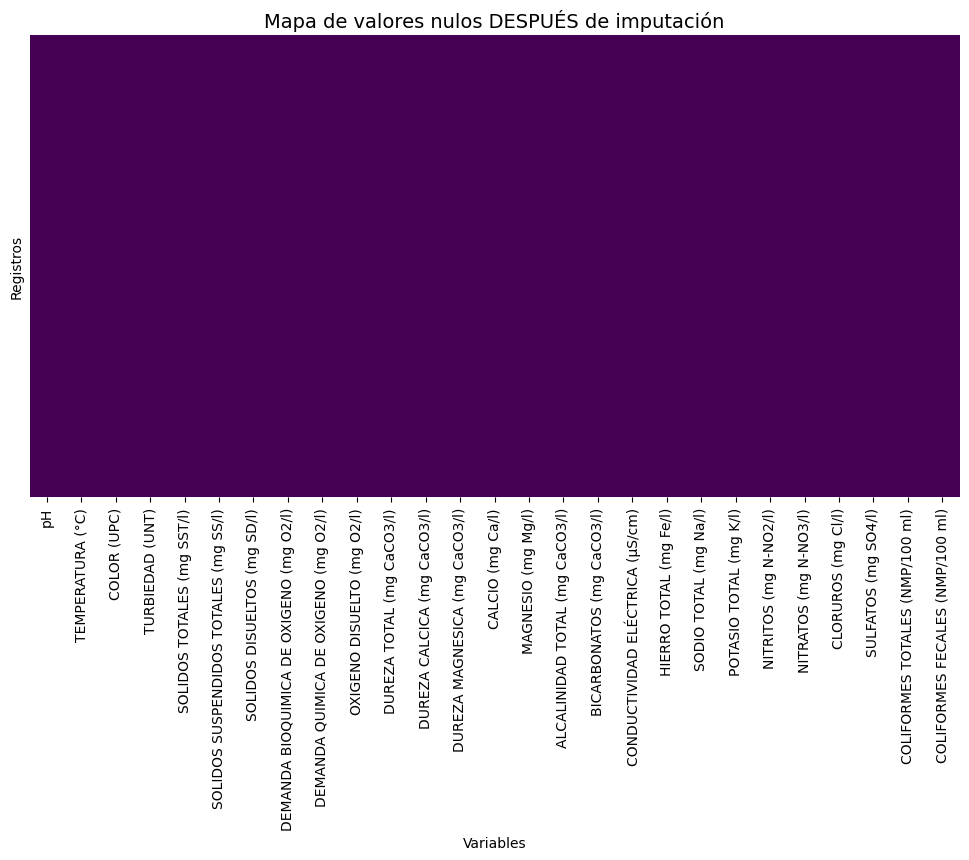

In [20]:
# 1. Escalar los datos
scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_filtrado),
    columns=df_filtrado.columns
)

# 2. Imputar con KNN
imputer = KNNImputer(n_neighbors=5, weights="distance")
df_imputed_scaled = pd.DataFrame(
    imputer.fit_transform(df_scaled),
    columns=df_scaled.columns
)

# 3. Desescalar (volver a la escala original)
df_imputed = pd.DataFrame(
    scaler.inverse_transform(df_imputed_scaled),
    columns=df_filtrado.columns
)

# 4. Visualizar el resultado (valores nulos después de imputación)
plt.figure(figsize=(12, 6))
sns.heatmap(df_imputed.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Mapa de valores nulos DESPUÉS de imputación", fontsize=14)
plt.xlabel("Variables")
plt.ylabel("Registros")
plt.show()

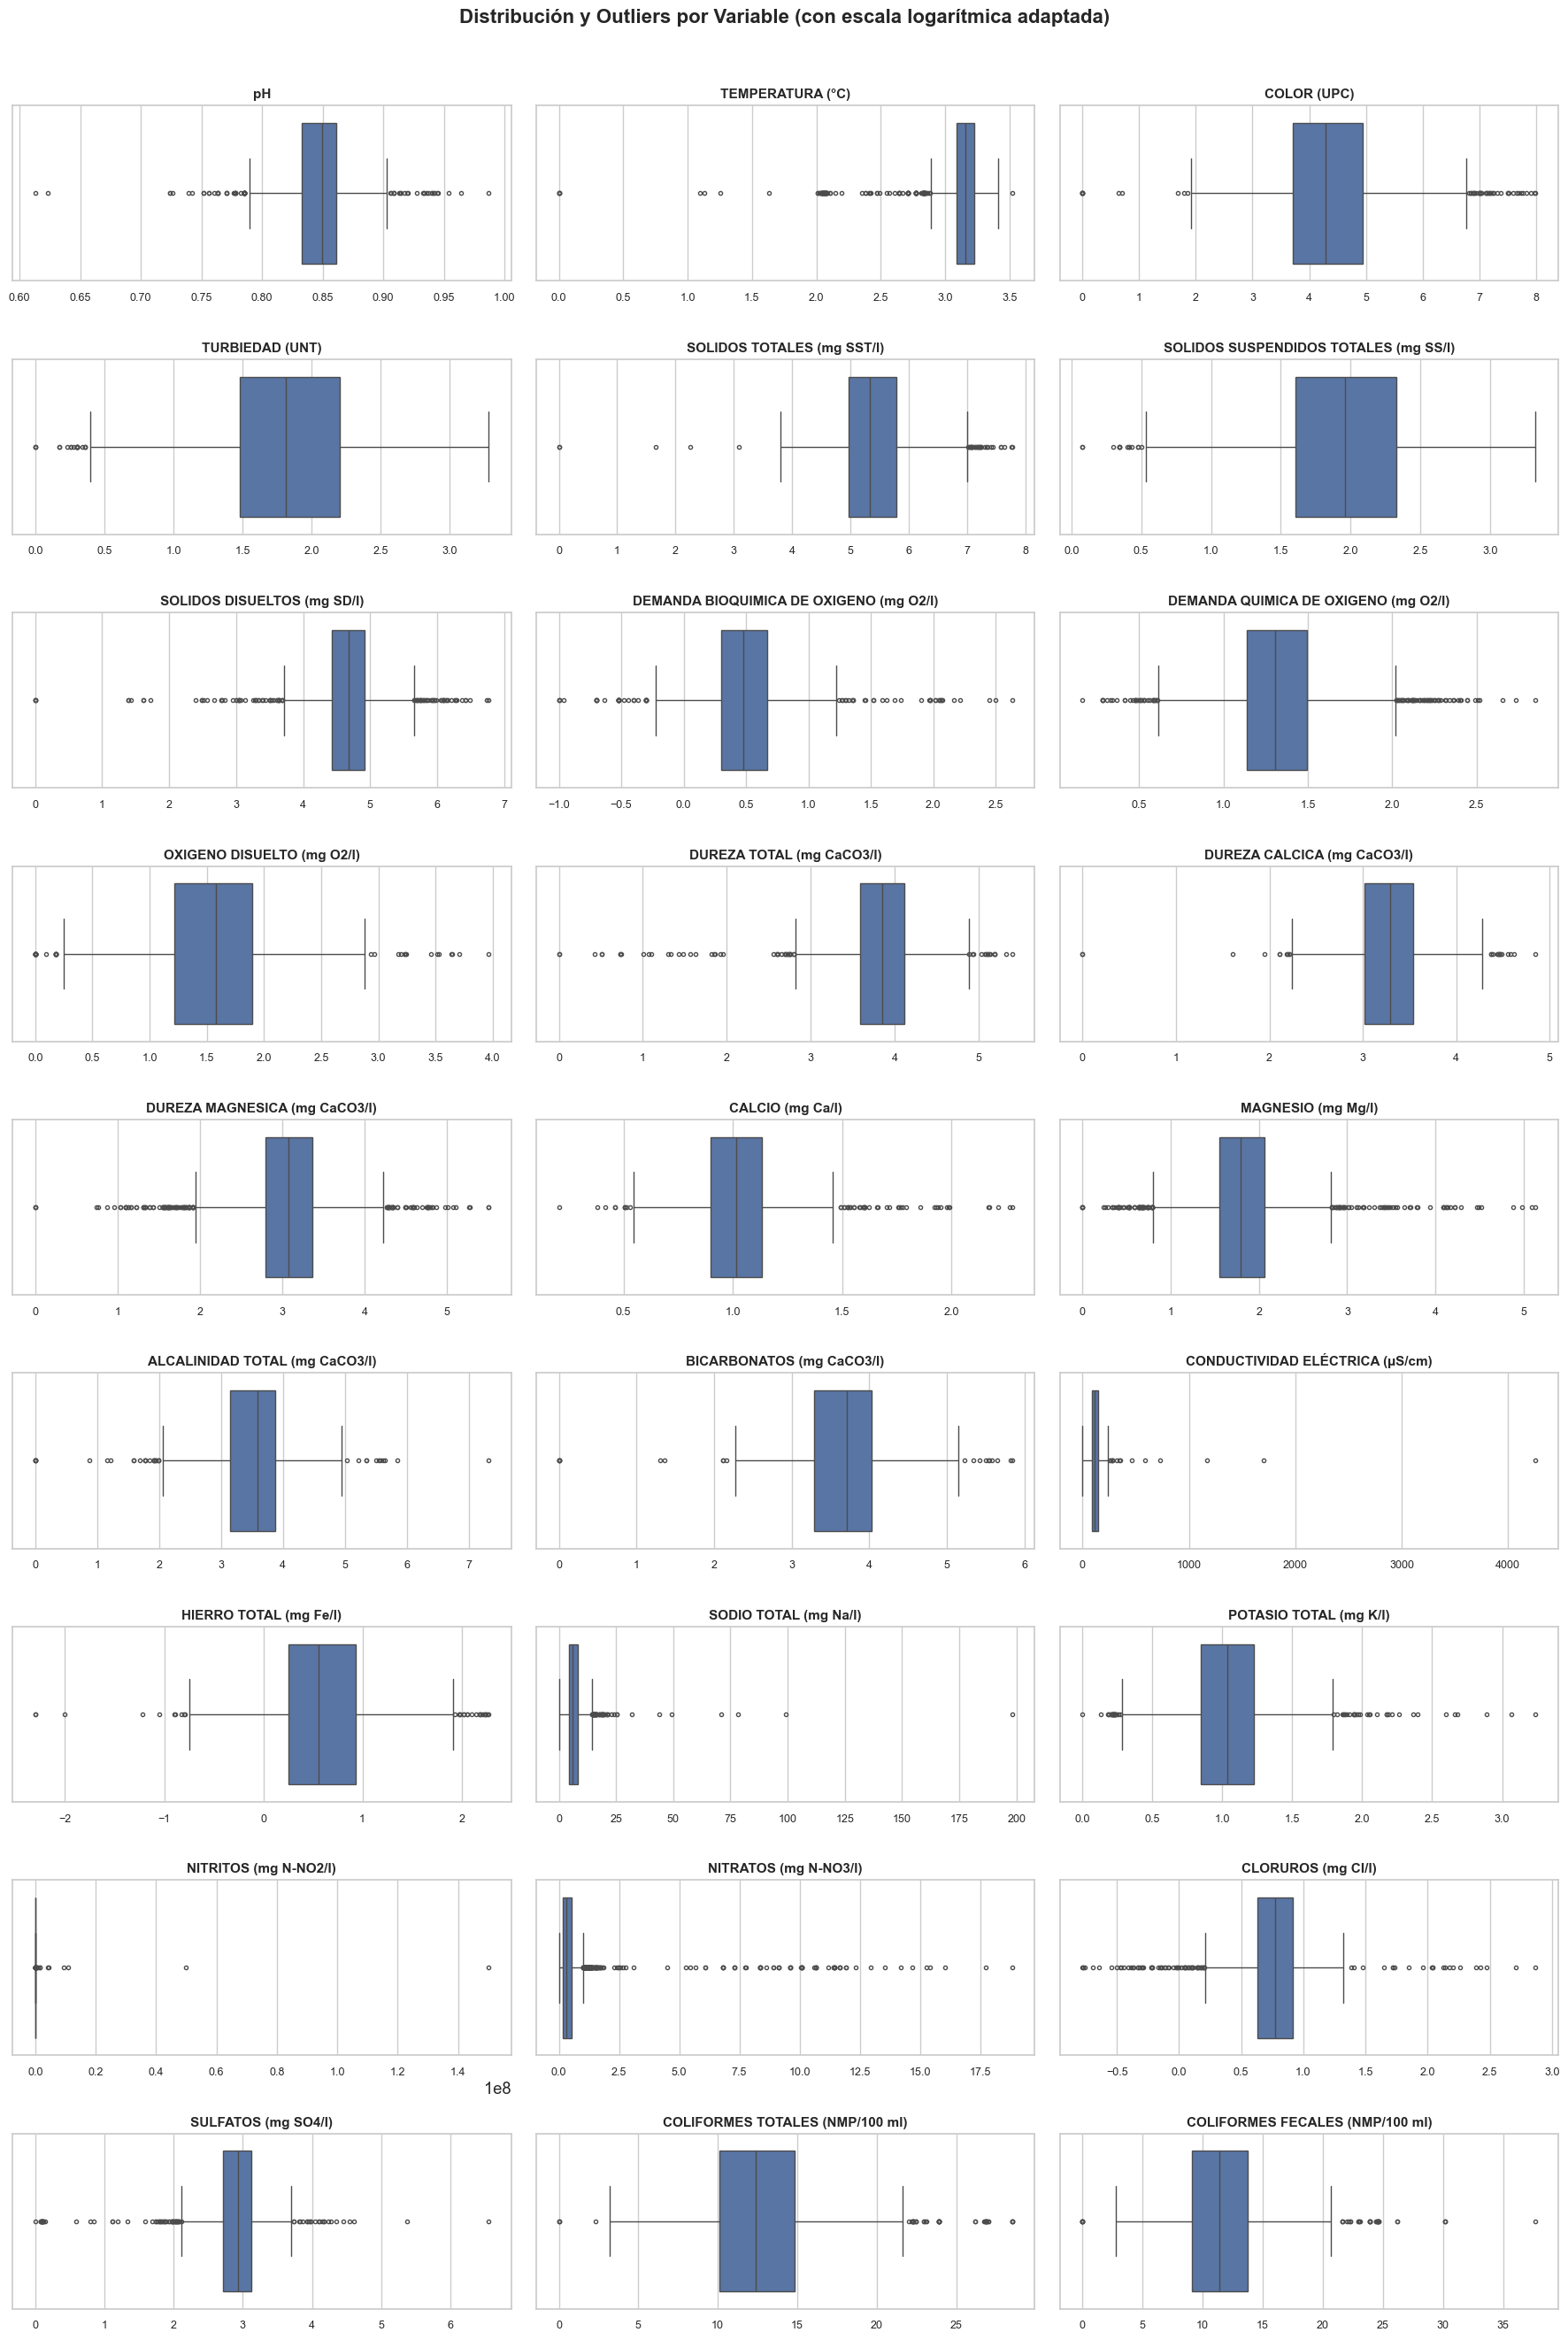

In [21]:
# Estilo gráfico
sns.set_theme(style="whitegrid", font_scale=1.2)

# Copia segura de la base imputada
df_box = df_imputed.copy()

# Función: aplicar logaritmo solo si es seguro
def log_transform_safe(series):
    s = pd.to_numeric(series, errors="coerce")
    if (s > 0).all():
        return np.log10(s)          # log base 10 si todos > 0
    elif (s >= 0).all():
        return np.log1p(s)          # log(1+x) si todos >= 0
    else:
        return s                    # si hay negativos, no se transforma

# Aplicar la transformación log segura a cada columna
df_box = df_box.apply(log_transform_safe)

# Configuración de subplots
num_vars = len(df_box.columns)
num_cols = 3
num_rows = int(np.ceil(num_vars / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 3))
axes = axes.flatten()

# Crear un boxplot por variable
for i, col in enumerate(df_box.columns):
    sns.boxplot(
        x=df_box[col],
        ax=axes[i],
        color="#4C72B0",
        fliersize=3,    # tamaño de puntos atípicos
        linewidth=1
    )
    axes[i].set_title(col, fontsize=11, fontweight="bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].tick_params(axis='x', labelsize=9)

# Eliminar subplots vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar diseño
fig.suptitle(
    "Distribución y Outliers por Variable (con escala logarítmica adaptada)",
    fontsize=16, fontweight="bold"
)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [22]:
ols_prob = ['NITRITOS (mg N-NO2/l)', 'CONDUCTIVIDAD ELÉCTRICA (µS/cm)']

diag = []
for c in ols_prob:
    s = pd.to_numeric(df_imputed[c], errors='coerce').dropna()

    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    outliers = ((s < q1 - 1.5*iqr) | (s > q3 + 1.5*iqr))

    diag.append({
        'col': c,
        'n': s.size,
        'zeros_%': (s.eq(0).mean() * 100).round(2),
        'min': s.min(),
        'q1': q1, 
        'median': s.median(), 
        'q3': q3, 
        'max': s.max(),
        'skew': s.skew(), 
        'kurt': s.kurt(),
        'outliers(n)': int(outliers.sum()),
        'outliers_%': (outliers.mean() * 100).round(2)
    })

pd.DataFrame(diag)

,col,n,zeros_%,min,q1,median,q3,max,skew,kurt,outliers(n),outliers_%
0,NITRITOS (mg N-NO2/l),2254,0.0,-1.455192e-11,0.01,0.0251,0.08885,150000000.0,41.428283,1810.841234,446,19.79
1,CONDUCTIVIDAD ELÉCTRICA (µS/cm),2254,0.0,-1.421085e-14,87.50,117.0000,151.00000,4259.0,28.374031,1052.214221,14,0.62


In [23]:
# Top 10 valores más altos para revisar posibles errores/unidades
cols_prob = ['NITRITOS (mg N-NO2/l)', 'CONDUCTIVIDAD ELÉCTRICA (µS/cm)']

for c in cols_prob:
    print(f"\nTop 10 valores de {c}:")
    top_vals = (
        df_imputed[[c]]
        .reset_index(names="idx")   # mostrar índice original como columna
        .sort_values(c, ascending=False)
        .head(10)
    )
    display(top_vals)


Top 10 valores de NITRITOS (mg N-NO2/l):


,idx,NITRITOS (mg N-NO2/l)
2166,2166,150000000.0
2174,2174,50000000.0
2171,2171,11000000.0
2172,2172,9300000.0
2168,2168,4600000.0
2175,2175,4300000.0
2180,2180,1500000.0
2165,2165,1500000.0
2186,2186,930000.0
2164,2164,430000.0



Top 10 valores de CONDUCTIVIDAD ELÉCTRICA (µS/cm):


,idx,CONDUCTIVIDAD ELÉCTRICA (µS/cm)
1078,1078,4259.0
1885,1885,1706.0
649,649,1172.0
374,374,727.2
1887,1887,589.0
1437,1437,467.0
744,744,354.0
342,342,343.4
46,46,319.5
561,561,283.9


In [24]:
def transform_robusta_para_plot(s: pd.Series, p_low=0.005, p_high=0.995):

    s = pd.to_numeric(s, errors='coerce').dropna()

    # epsilon = mitad del mínimo positivo para permitir log(0)
    min_pos = s[s > 0].min()
    eps = min_pos/2 if pd.notna(min_pos) and min_pos > 0 else 1e-12

    # Transformación según el rango
    if (s >= 0).all():
        s = np.log10(s + eps)
    else:
        med = s.median()
        iqr = (s.quantile(0.75) - s.quantile(0.25)) or 1.0
        s = (s - med) / iqr

    # Winsorización para limitar outliers extremos
    lo, hi = s.quantile(p_low), s.quantile(p_high)
    return s.clip(lo, hi)


# Copia para graficar con variables transformadas
df_plot = df_imputed.copy()
for c in cols_prob:
    df_plot[c] = transform_robusta_para_plot(df_imputed[c])


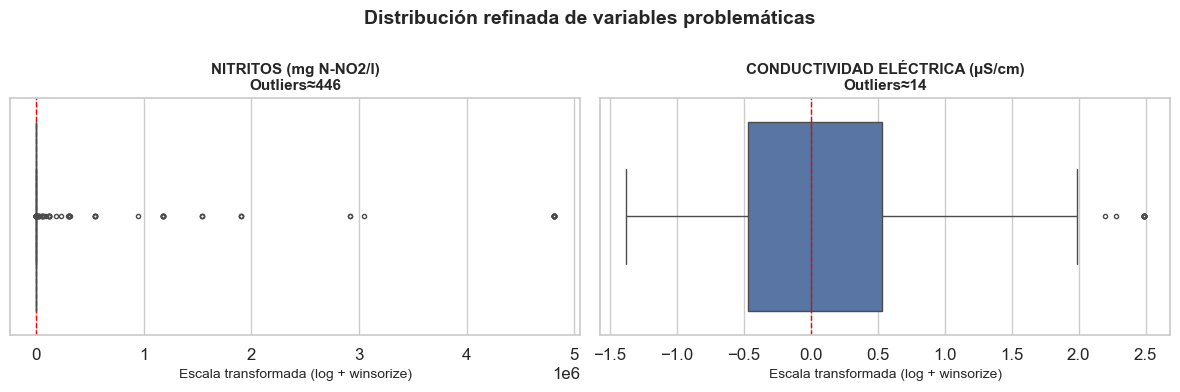

In [25]:
sns.set_theme(style="whitegrid", font_scale=1.1)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for ax, col in zip(axes, cols_prob):
    sns.boxplot(
        x=df_plot[col], 
        ax=ax, 
        color="#4C72B0", 
        fliersize=3, 
        linewidth=1
    )
    # Línea en la mediana
    ax.axvline(df_plot[col].median(), ls="--", color="red", lw=1)
    
    # Contar outliers extremos (en escala transformada)
    q1, q3 = df_plot[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    outliers = ((df_plot[col] < q1 - 1.5*iqr) | (df_plot[col] > q3 + 1.5*iqr)).sum()

    ax.set_title(f"{col}\nOutliers≈{outliers}", fontsize=11, fontweight="bold")
    ax.set_xlabel("Escala transformada (log + winsorize)", fontsize=10)
    ax.set_ylabel("")

fig.suptitle("Distribución refinada de variables problemáticas", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


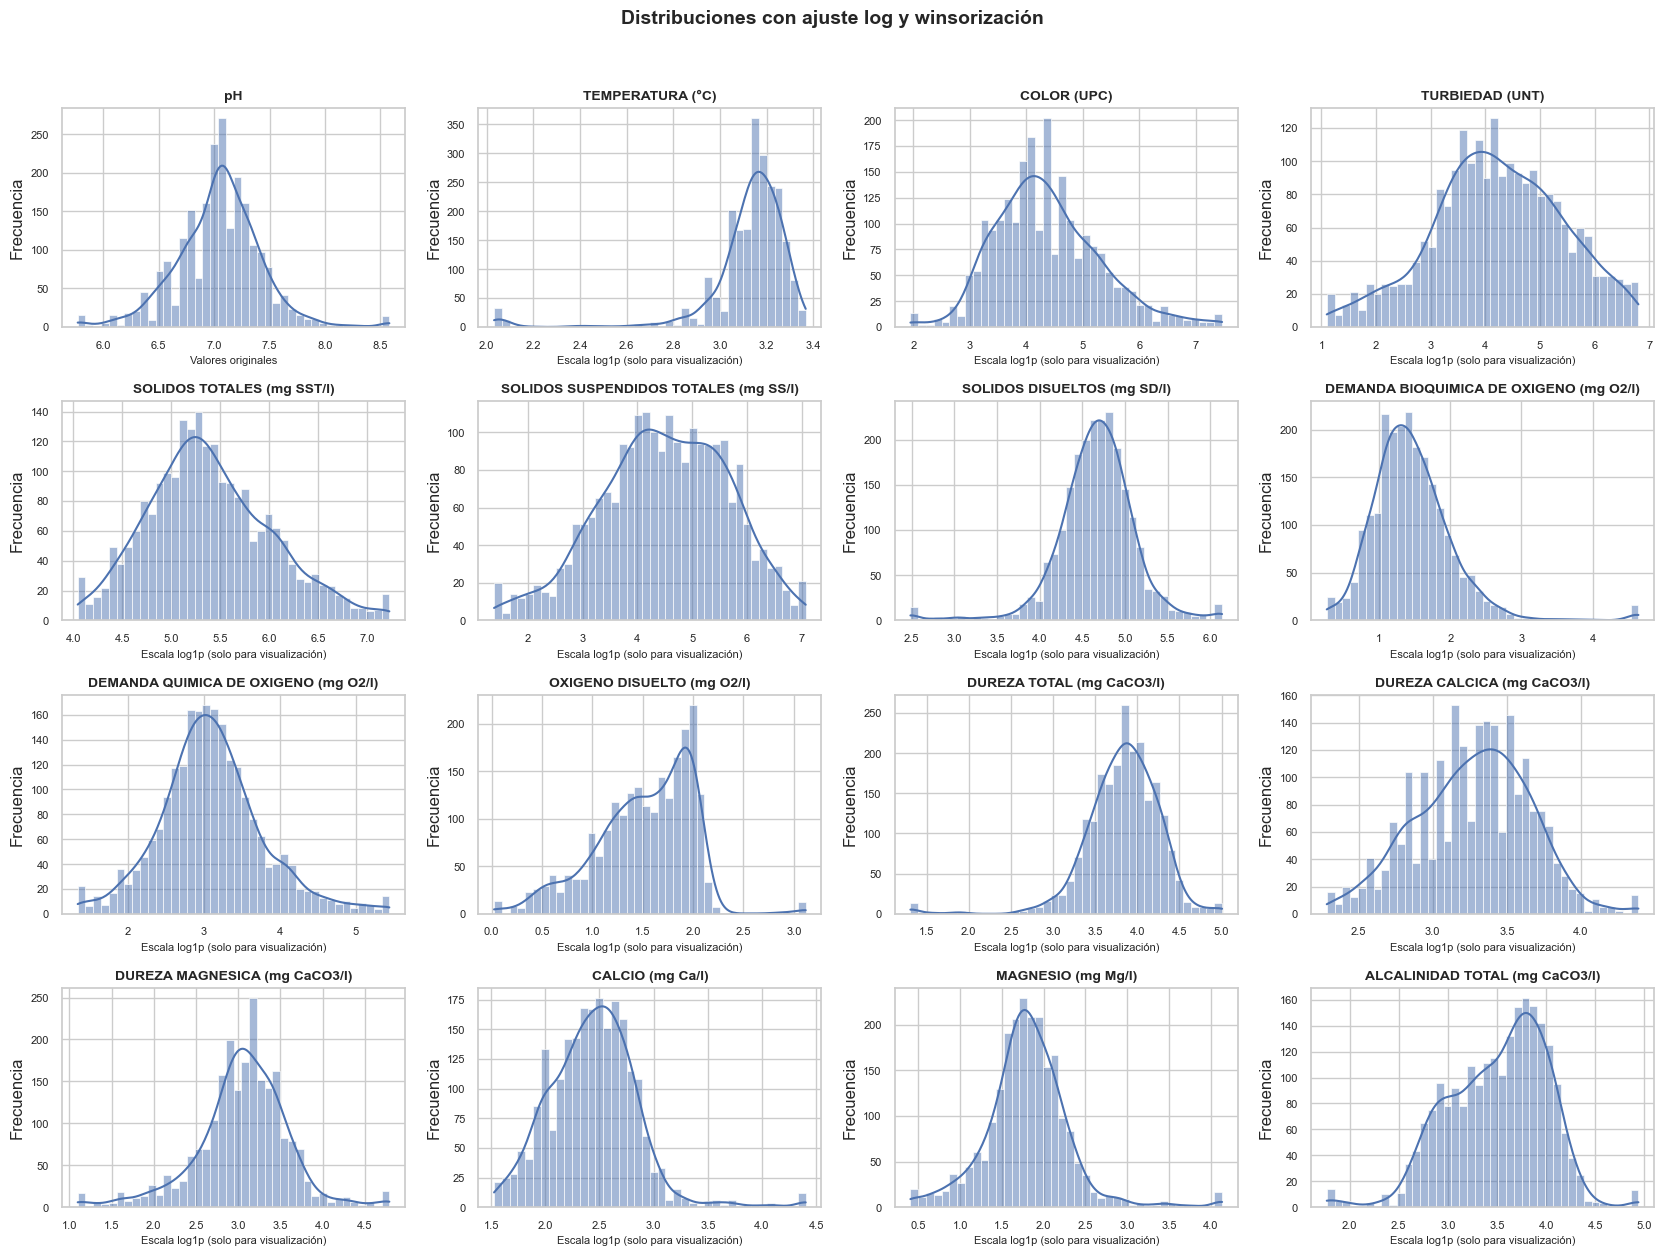

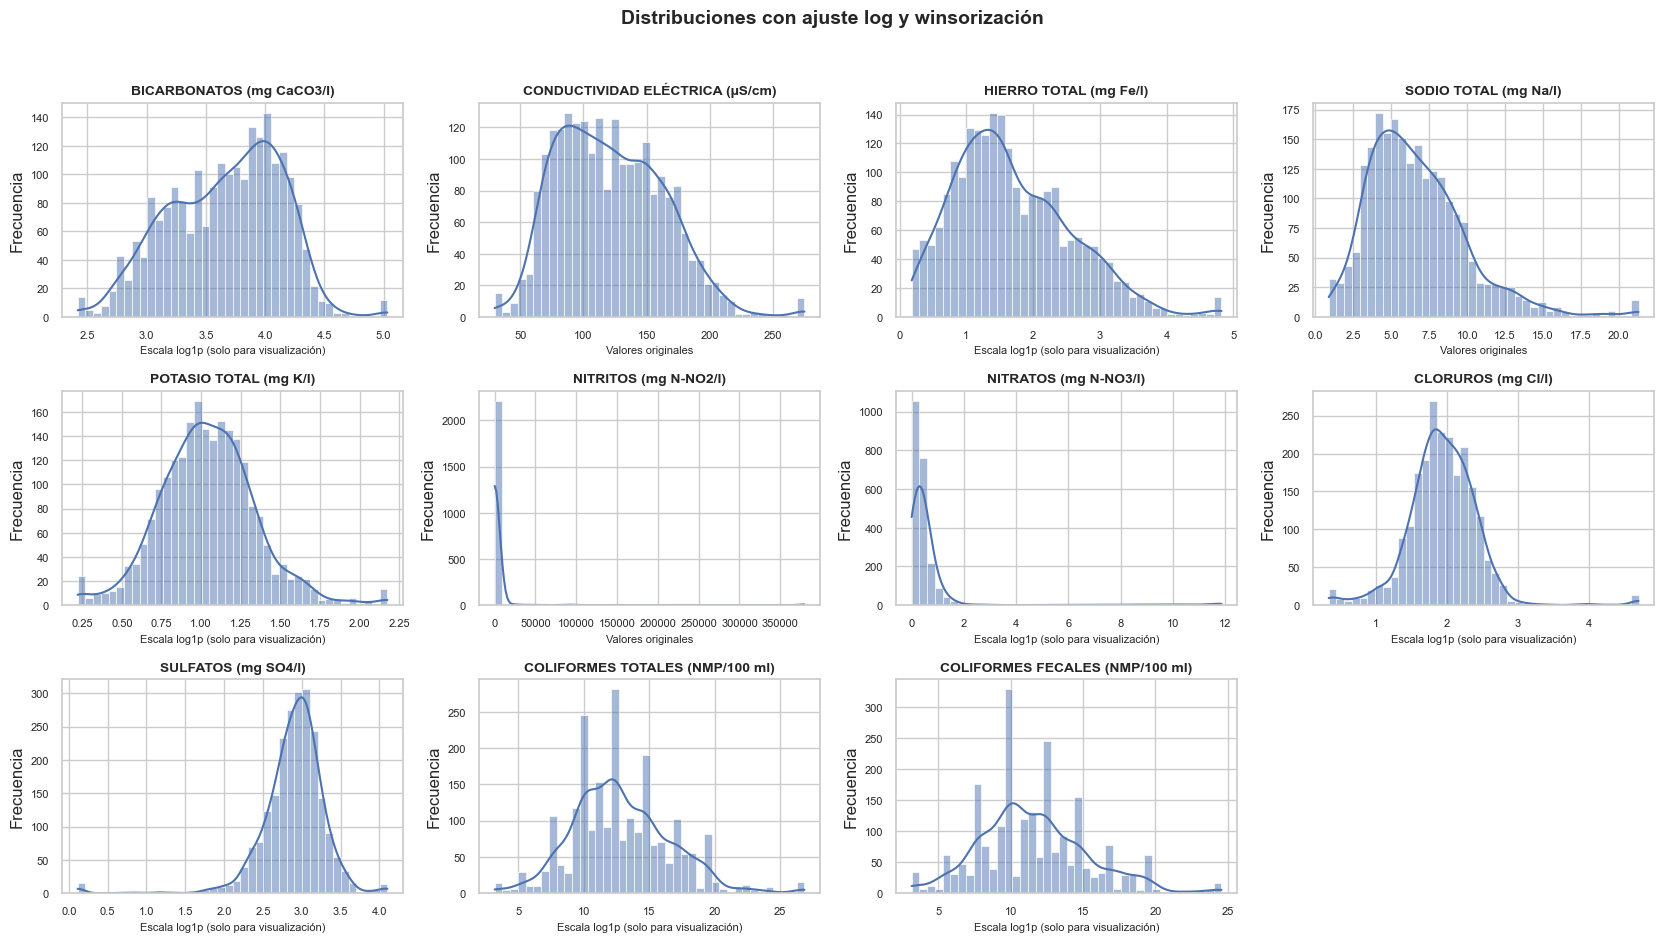

In [26]:
sns.set_theme(style="whitegrid")

# utilidad: decidir si conviene log
def needs_log(series, skew_thr=1.0):
    s = pd.to_numeric(series, errors='coerce').dropna()
    return (s.min() >= 0) and (abs(s.skew()) > skew_thr)

# utilidad: preparar para graficar
def prep_for_plot(series, winsor=(0.005, 0.995), bins=40):
    s = pd.to_numeric(series, errors='coerce').dropna()
    if needs_log(s):
        s = np.log1p(s)   # log(1+x), estable para 0+
        xlab = "Escala log1p (solo para visualización)"
    else:
        xlab = "Valores originales"
    lo, hi = s.quantile(winsor[0]), s.quantile(winsor[1])
    s = s.clip(lo, hi)
    return s, xlab

# columnas numéricas válidas
num_cols = df_imputed.select_dtypes(include='number').columns.tolist()
num_cols = [c for c in num_cols if df_imputed[c].notna().any()]

# parámetros de layout
COLS = 4
BINS = 40
PAGE = COLS * 4
H, W = 3.2, 4.2

# loop por páginas
for start in range(0, len(num_cols), PAGE):
    subset = num_cols[start:start+PAGE]
    rows = int(np.ceil(len(subset) / COLS))
    fig, axes = plt.subplots(rows, COLS, figsize=(W*COLS, H*rows))
    axes = np.array(axes).reshape(-1)

    for ax, col in zip(axes, subset):
        s_plot, xlab = prep_for_plot(df_imputed[col], winsor=(0.005, 0.995), bins=BINS)
        sns.histplot(s_plot, bins=BINS, kde=(len(s_plot) > 50), ax=ax, color="#4C72B0")
        ax.set_title(col, fontsize=10, fontweight="bold")
        ax.set_xlabel(xlab, fontsize=8)
        ax.set_ylabel("Frecuencia")
        ax.tick_params(axis='both', labelsize=8)

    # limpiar ejes vacíos
    for ax in axes[len(subset):]:
        ax.remove()

    fig.suptitle("Distribuciones con ajuste log y winsorización", fontsize=14, fontweight="bold")
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


# CORRELACIONES (excluyendo objetivos)

Columnas usadas para correlación entre predictores: 25
Objetivos excluidos del mapa entre predictores: ['DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)', 'pH']

Pares altamente correlacionados (Pearson):


,Variable_1,Variable_2,Correlacion
285,NITRITOS (mg N-NO2/l),NITRATOS (mg N-NO3/l),0.999167
69,SOLIDOS TOTALES (mg SST/l),SOLIDOS SUSPENDIDOS TOTALES (mg SS/l),0.945886
209,CALCIO (mg Ca/l),MAGNESIO (mg Mg/l),0.889820
196,DUREZA MAGNESICA (mg CaCO3/l),MAGNESIO (mg Mg/l),0.862277



Pares altamente correlacionados (Spearman):


,Variable_1,Variable_2,Correlacion
196,DUREZA MAGNESICA (mg CaCO3/l),MAGNESIO (mg Mg/l),0.989248
181,DUREZA CALCICA (mg CaCO3/l),CALCIO (mg Ca/l),0.959695
234,ALCALINIDAD TOTAL (mg CaCO3/l),BICARBONATOS (mg CaCO3/l),0.933178
299,COLIFORMES TOTALES (NMP/100 ml),COLIFORMES FECALES (NMP/100 ml),0.890696
69,SOLIDOS TOTALES (mg SST/l),SOLIDOS SUSPENDIDOS TOTALES (mg SS/l),0.863731
164,DUREZA TOTAL (mg CaCO3/l),DUREZA CALCICA (mg CaCO3/l),0.817818
165,DUREZA TOTAL (mg CaCO3/l),DUREZA MAGNESICA (mg CaCO3/l),0.804018


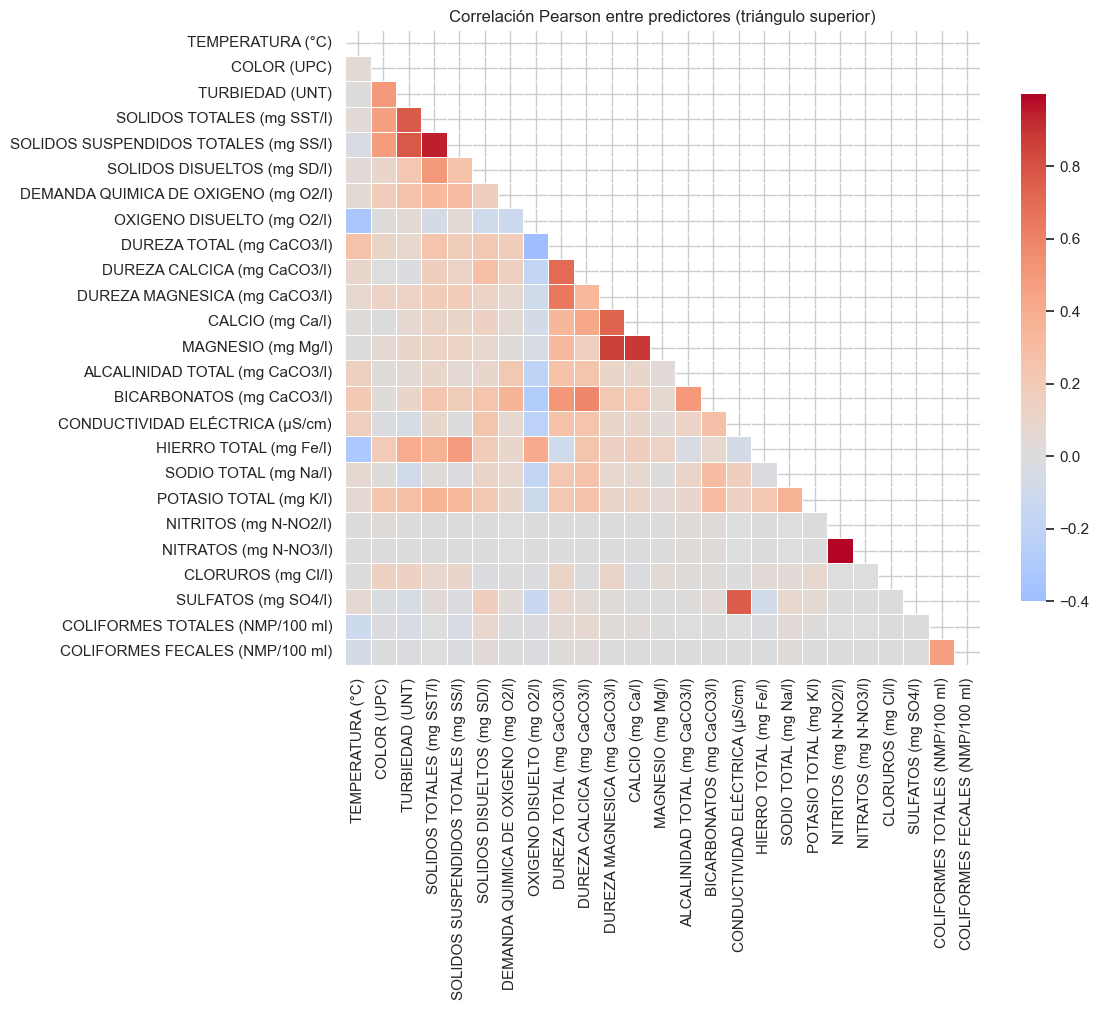

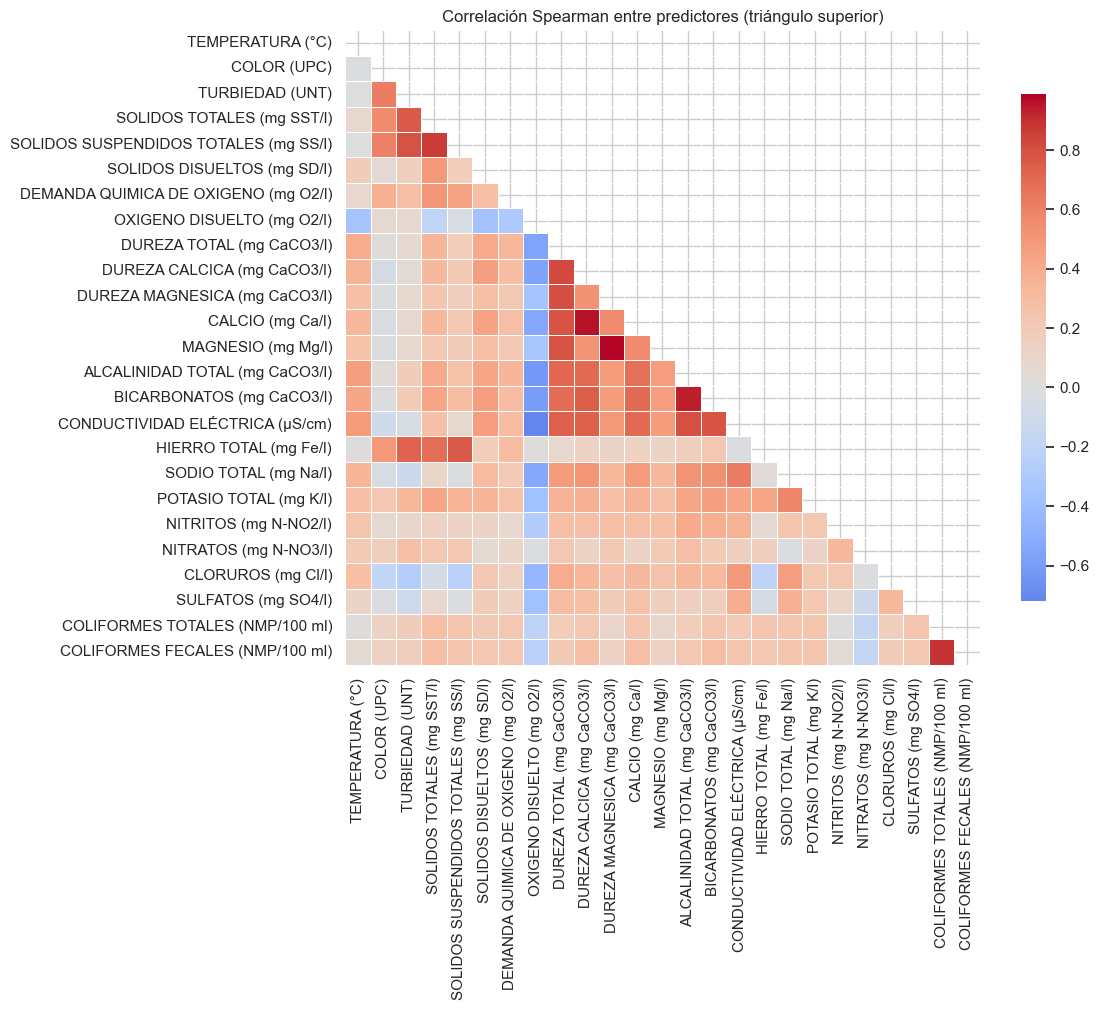


Correlación Spearman de predictores con el objetivo: DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)


,Spearman_vs_objetivo
BICARBONATOS (mg CaCO3/l),0.526899
CONDUCTIVIDAD ELÉCTRICA (µS/cm),0.500682
ALCALINIDAD TOTAL (mg CaCO3/l),0.488444
CALCIO (mg Ca/l),0.460828
DUREZA CALCICA (mg CaCO3/l),0.458406
SODIO TOTAL (mg Na/l),0.381278
DUREZA TOTAL (mg CaCO3/l),0.357546
COLIFORMES FECALES (NMP/100 ml),0.354755
POTASIO TOTAL (mg K/l),0.335980
DEMANDA QUIMICA DE OXIGENO (mg O2/l),0.320140



Correlación Spearman de predictores con el objetivo: pH


,Spearman_vs_objetivo
NITRATOS (mg N-NO3/l),0.306038
ALCALINIDAD TOTAL (mg CaCO3/l),0.285236
BICARBONATOS (mg CaCO3/l),0.243331
TEMPERATURA (°C),0.235442
DUREZA CALCICA (mg CaCO3/l),0.172514
NITRITOS (mg N-NO2/l),0.170256
CALCIO (mg Ca/l),0.164018
CONDUCTIVIDAD ELÉCTRICA (µS/cm),0.158347
DUREZA TOTAL (mg CaCO3/l),0.153381
SOLIDOS SUSPENDIDOS TOTALES (mg SS/l),0.107343


In [27]:
# Requisitos: df_imputed ya creado; 'objetivos' definido (1 o 2 nombres exactos en df_imputed)

# Preparar base numérica y limpiar
df_num = df_imputed.select_dtypes(include='number').copy()
df_num = df_num.replace([np.inf, -np.inf], np.nan).dropna(axis=1, how='all')

# Quitar columnas constantes
var0 = df_num.nunique(dropna=True) <= 1
if var0.any():
    df_num = df_num.loc[:, ~var0]

# Excluir objetivos del bloque de correlación entre predictores
objetivos_presentes = [o for o in (objetivos if 'objetivos' in globals() else []) if o in df_num.columns]
pred_cols = [c for c in df_num.columns if c not in objetivos_presentes]

print(f"Columnas usadas para correlación entre predictores: {len(pred_cols)}")
if objetivos_presentes:
    print("Objetivos excluidos del mapa entre predictores:", objetivos_presentes)

assert len(pred_cols) > 1, "No hay columnas numéricas válidas para correlación entre predictores."

# Correlaciones entre predictores (Pearson y Spearman)
corr_p = df_num[pred_cols].corr(method='pearson')
corr_s = df_num[pred_cols].corr(method='spearman')

# Función para extraer pares fuertes (sin duplicados)
def pares_fuertes(corr, umbral=0.8):
    mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
    corr_u = corr.where(mask)
    out = (
        corr_u.stack()
        .rename("Correlacion")
        .reset_index()
        .rename(columns={"level_0": "Variable_1", "level_1": "Variable_2"})
        .assign(abs_val=lambda d: d["Correlacion"].abs())
        .query("abs_val >= @umbral")
        .sort_values("abs_val", ascending=False)
        .drop(columns="abs_val")
    )
    return out

pares_pearson  = pares_fuertes(corr_p, umbral=0.8)
pares_spearman = pares_fuertes(corr_s, umbral=0.8)

print("\nPares altamente correlacionados (Pearson):")
display(pares_pearson.head(20))
print("\nPares altamente correlacionados (Spearman):")
display(pares_spearman.head(20))

# Heatmaps (triángulo superior)
def heatmap_corr(corr, title):
    mask = np.triu(np.ones_like(corr, dtype=bool))
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        corr, mask=mask, cmap="coolwarm", center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .8}
    )
    plt.title(title)
    plt.tight_layout()
    plt.show()

heatmap_corr(corr_p, "Correlación Pearson entre predictores (triángulo superior)")
heatmap_corr(corr_s, "Correlación Spearman entre predictores (triángulo superior)")

# (Extra útil) Correlación de CADA objetivo vs. predictores
if objetivos_presentes:
    for obj in objetivos_presentes:
        # solo columnas que coexisten con el objetivo sin NaN simultáneo
        sub = df_num[pred_cols + [obj]].dropna(subset=[obj])
        corr_obj = sub.corr(method='spearman')[obj].drop(labels=[obj]).sort_values(ascending=False)
        print(f"\nCorrelación Spearman de predictores con el objetivo: {obj}")
        display(corr_obj.to_frame(name="Spearman_vs_objetivo"))


# FILTRO POR COLINEALIDAD (Spearman)

In [28]:
# Usa corr_s (entre predictores) ya calculado
UMBRAL = 0.85  # ajusta a gusto (0.8-0.9 suele ser razonable)

corr_abs = corr_s.abs()
mask_sup = np.triu(np.ones_like(corr_abs, dtype=bool), k=1)
pairs = (
    corr_abs.where(mask_sup)
    .stack()
    .rename("rho")
    .reset_index()
    .rename(columns={"level_0": "A", "level_1": "B"})
    .query("rho >= @UMBRAL")
    .sort_values("rho", ascending=False)
)

print(f"Pares con |Spearman| ≥ {UMBRAL}: {len(pairs)}")
display(pairs.head(20))

# ===== Heurística mejorada para decidir a quién eliminar =====
# 1) Preferir la variable con MAYOR |corr| respecto al/los objetivo(s) seleccionados.
# 2) Si no hay objetivos (o empate), usar el mayor promedio de |corr| con las demás (tu fallback).

# Objetivos presentes en df_num (si definiste 'objetivos' antes)
objetivos_presentes = [o for o in (objetivos if 'objetivos' in globals() else []) if o in df_imputed.columns]

# Construir score por variable basado en relación con objetivos
target_score = {}
if objetivos_presentes:
    # Spearman entre TODOS los numéricos y cada objetivo (en abs) y tomamos el máximo por variable
    for var in df_num.columns:
        if var in objetivos_presentes:
            continue
        cors = []
        for obj in objetivos_presentes:
            sub = df_imputed[[var, obj]].dropna()
            if sub.shape[0] > 2:
                cors.append(sub.corr(method='spearman').iloc[0, 1])
        target_score[var] = np.max(np.abs(cors)) if cors else 0.0
else:
    # si no hay objetivos, score = 0 (se usará el fallback)
    target_score = {var: 0.0 for var in df_num.columns}

# Fallback: correlación media absoluta con el resto (tu criterio original)
mean_abs_corr = corr_abs.mean().to_dict()

eliminar, conservar = set(), set()

for _, row in pairs.iterrows():
    a, b = row["A"], row["B"]
    # si ya se decidió algo por pares anteriores, saltar
    if a in eliminar or b in eliminar:
        continue

    # nunca eliminar objetivos (por seguridad, aunque aquí no deberían estar)
    if a in objetivos_presentes:
        conservar.add(a); eliminar.add(b); continue
    if b in objetivos_presentes:
        conservar.add(b); eliminar.add(a); continue

    # 1) usar score con objetivos
    ta, tb = target_score.get(a, 0.0), target_score.get(b, 0.0)

    if not np.isclose(ta, tb):
        keep, drop = (a, b) if ta > tb else (b, a)
    else:
        # 2) empate o sin objetivos -> usar promedio de |corr|
        ma, mb = mean_abs_corr.get(a, 0.0), mean_abs_corr.get(b, 0.0)
        keep, drop = (a, b) if ma >= mb else (b, a)

    conservar.add(keep)
    eliminar.add(drop)

eliminar = sorted(eliminar)
print(f"\nVariables a eliminar por alta colinealidad (heurística objetivo→fallback):")
print(eliminar)

# DataFrame filtrado por correlación (listo para VIF / feature selection)
df_corr_filtered = df_num.drop(columns=eliminar, errors='ignore')

print(f"\nShape original (numérico): {df_num.shape}")
print(f"Shape tras filtrar por correlación: {df_corr_filtered.shape}")

# ver resumen de lo conservado
conservadas = list(df_corr_filtered.columns)
print(f"\nVariables conservadas ({len(conservadas)}):")
conservadas

Pares con |Spearman| ≥ 0.85: 5


,A,B,rho
196,DUREZA MAGNESICA (mg CaCO3/l),MAGNESIO (mg Mg/l),0.989248
181,DUREZA CALCICA (mg CaCO3/l),CALCIO (mg Ca/l),0.959695
234,ALCALINIDAD TOTAL (mg CaCO3/l),BICARBONATOS (mg CaCO3/l),0.933178
299,COLIFORMES TOTALES (NMP/100 ml),COLIFORMES FECALES (NMP/100 ml),0.890696
69,SOLIDOS TOTALES (mg SST/l),SOLIDOS SUSPENDIDOS TOTALES (mg SS/l),0.863731



Variables a eliminar por alta colinealidad (heurística objetivo→fallback):
['ALCALINIDAD TOTAL (mg CaCO3/l)', 'COLIFORMES TOTALES (NMP/100 ml)', 'DUREZA CALCICA (mg CaCO3/l)', 'DUREZA MAGNESICA (mg CaCO3/l)', 'SOLIDOS SUSPENDIDOS TOTALES (mg SS/l)']

Shape original (numérico): (2254, 27)
Shape tras filtrar por correlación: (2254, 22)

Variables conservadas (22):


['pH',
 'TEMPERATURA (°C)',
 'COLOR (UPC)',
 'TURBIEDAD (UNT)',
 'SOLIDOS TOTALES (mg SST/l)',
 'SOLIDOS DISUELTOS (mg SD/l)',
 'DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)',
 'DEMANDA QUIMICA DE OXIGENO (mg O2/l)',
 'OXIGENO DISUELTO (mg O2/l)',
 'DUREZA TOTAL (mg CaCO3/l)',
 'CALCIO (mg Ca/l)',
 'MAGNESIO (mg Mg/l)',
 'BICARBONATOS (mg CaCO3/l)',
 'CONDUCTIVIDAD ELÉCTRICA (µS/cm)',
 'HIERRO TOTAL (mg Fe/l)',
 'SODIO TOTAL (mg Na/l)',
 'POTASIO TOTAL (mg K/l)',
 'NITRITOS (mg N-NO2/l)',
 'NITRATOS (mg N-NO3/l)',
 'CLORUROS (mg Cl/l)',
 'SULFATOS (mg SO4/l)',
 'COLIFORMES FECALES (NMP/100 ml)']

# VIF iterativo

In [29]:
# df_corr_filtered: viene del paso anterior (filtrado por correlación)
X0 = df_corr_filtered.copy()

# Por seguridad, quitar filas con NaN residuales
X0 = X0.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

# Objetivos a proteger (no deben eliminarse nunca)
objetivos_presentes = [o for o in (objetivos if 'objetivos' in globals() else []) if o in X0.columns]

def calc_vif(dfX: pd.DataFrame) -> pd.DataFrame:
    """Calcula VIF para todas las columnas de dfX."""
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    Xmat = dfX.values
    vif_vals = [variance_inflation_factor(Xmat, i) for i in range(Xmat.shape[1])]
    return pd.DataFrame({"feature": dfX.columns, "VIF": vif_vals}).sort_values("VIF", ascending=False)

UMBRAL_VIF = 10.0
removed = []
vif_historial = []

X = X0.copy()

while True:
    vif_df = calc_vif(X)
    vif_historial.append(vif_df.assign(iter=len(vif_historial)+1))

    # variable con VIF máximo
    idx_max = vif_df["VIF"].idxmax()
    feat_max = vif_df.loc[idx_max, "feature"]
    max_vif = vif_df.loc[idx_max, "VIF"]

    print(f"Iteración {len(vif_historial)} | Máx VIF = {max_vif:.2f} ({feat_max}) | n_vars = {X.shape[1]}")

    # condición de parada
    if (max_vif <= UMBRAL_VIF) or (X.shape[1] <= 2):
        break

    # NO eliminar objetivos
    if feat_max in objetivos_presentes:
        print(f"{feat_max} es objetivo, se conserva aunque tenga VIF alto.")
        break

    # eliminar la variable más colineal y repetir
    removed.append((feat_max, float(max_vif)))
    X = X.drop(columns=[feat_max])

# DataFrames de salida
vif_historial = pd.concat(vif_historial, ignore_index=True)
vif_final = calc_vif(X).reset_index(drop=True)
df_vif_filtered = X.copy()

print("\nVariables eliminadas por VIF > {:.1f}:".format(UMBRAL_VIF))
for f, v in removed:
    print(f"  - {f} (VIF={v:.2f})")

print("\nResumen:")
print(f"Shape inicial (post-correlación): {X0.shape}")
print(f"Shape final (post-VIF):           {df_vif_filtered.shape}")

print("\nVIF final (variables conservadas):")
display(vif_final)

Iteración 1 | Máx VIF = 616.90 (NITRITOS (mg N-NO2/l)) | n_vars = 22
Iteración 2 | Máx VIF = 5.86 (CALCIO (mg Ca/l)) | n_vars = 21

Variables eliminadas por VIF > 10.0:
  - NITRITOS (mg N-NO2/l) (VIF=616.90)

Resumen:
Shape inicial (post-correlación): (2254, 22)
Shape final (post-VIF):           (2254, 21)

VIF final (variables conservadas):


,feature,VIF
0,CALCIO (mg Ca/l),5.855409
1,MAGNESIO (mg Mg/l),5.740587
2,SOLIDOS TOTALES (mg SST/l),3.903843
3,TURBIEDAD (UNT),3.168682
4,HIERRO TOTAL (mg Fe/l),2.994304
5,CONDUCTIVIDAD ELÉCTRICA (µS/cm),2.949222
6,SULFATOS (mg SO4/l),2.608597
7,DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),2.223375
8,BICARBONATOS (mg CaCO3/l),1.979933
9,DUREZA TOTAL (mg CaCO3/l),1.911038


In [30]:
# PIPELINE AUTOMATIZADO
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# XGBoost opcional
try:
    from xgboost import XGBRegressor
    HAS_XGB = True
except Exception:
    HAS_XGB = False

# Helpers de features/targets, atados a 'objetivos'
def get_feature_frame_base():
    """
    Decide automáticamente la matriz de features de partida:
    - Si existe df_vif_filtered (post-colinealidad), usarlo (preferido).
    - Si no, usar df_base si existe.
    - Como último recurso, usar df_imputed (numéricas).
    """
    if 'df_vif_filtered' in globals():
        X0 = df_vif_filtered.copy()
    elif 'df_base' in globals():
        X0 = df_base.copy()
    else:
        X0 = df_imputed.select_dtypes(include='number').copy()
    # Limpieza mínima
    X0 = X0.replace([np.inf, -np.inf], np.nan).dropna(axis=1, how='all')
    # Quitar constantes
    if not X0.empty:
        const = X0.nunique(dropna=True) <= 1
        if const.any():
            X0 = X0.loc[:, ~const]
    return X0

def build_X_y_for_target(y_col: str):
    """
    Construye (X, y) alineados y listos para modelar:
    - X parte de df_vif_filtered (si existe) o de la base disponible.
    - Elimina la columna objetivo y cualquier columna no numérica en X.
    - y proviene SIEMPRE de df_imputed (para conservar imputación final).
    """
    assert y_col in df_imputed.columns, f"No encuentro la columna objetivo '{y_col}' en df_imputed."
    X0 = get_feature_frame_base()

    # Si por alguna razón el objetivo está en X0, lo quitamos
    if y_col in X0.columns:
        X0 = X0.drop(columns=[y_col])

    # Solo numéricas
    X = X0.select_dtypes(include='number').copy()

    # y alineada al índice de X
    y = df_imputed.loc[X.index, y_col].copy()

    # quitar filas con y NaN
    mask = y.notna()
    X = X.loc[mask]
    y = y.loc[mask]

    # Seguridad final
    X, y = X.align(y, join='inner', axis=0)
    assert X.shape[1] > 0 and len(y) > 0, f"X/y vacíos para {y_col}."
    return X, y

# Entrenamiento y evaluación
def eval_model(name, model, Xtr, Xte, ytr, yte, results_list, target):
    mdl = clone(model)
    mdl.fit(Xtr, ytr)
    pred = mdl.predict(Xte)
    r2  = r2_score(yte, pred)
    rmse = mean_squared_error(yte, pred, squared=False)
    mae = mean_absolute_error(yte, pred)
    results_list.append({"objetivo": target, "modelo": name, "R2": r2, "RMSE": rmse, "MAE": mae})
    return mdl, pred

# Modelos base (sencillos y claros)
def get_model_registry():
    models = {
        "LinearRegression": Pipeline([
            ("scaler", StandardScaler()),
            ("lin", LinearRegression())
        ]),
        "DecisionTree (CART)": DecisionTreeRegressor(random_state=42),
        "RandomForest": RandomForestRegressor(n_estimators=600, random_state=42, n_jobs=-1),
        "SVR (RBF)": Pipeline([
            ("scaler", MinMaxScaler()),
            ("svr", SVR(kernel="rbf", C=10.0, epsilon=0.1, gamma="scale"))
        ]),
        "MLPRegressor": Pipeline([
            ("scaler", StandardScaler()),
            ("mlp", MLPRegressor(hidden_layer_sizes=(64, 32), activation="relu",
                                 solver="adam", alpha=1e-3, max_iter=2000,
                                 random_state=42))
        ])
    }
    if HAS_XGB:
        models["XGBoost"] = XGBRegressor(
            n_estimators=800, learning_rate=0.05, max_depth=6,
            subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1
        )
    return models

# LOOP PRINCIPAL (usa 'objetivos')
assert 'objetivos' in globals() and 1 <= len(objetivos) <= 2, "Define 1 o 2 objetivos antes (con el selector)."

all_results = []                # lista de DataFrames por objetivo
trained_models = {}             # { objetivo: { nombre_modelo: instancia_entrenada } }
permutation_tables = {}         # { (objetivo, modelo): df_importancias }

for y_col in objetivos:
    # Construir datos
    X, y = build_X_y_for_target(y_col)

    # Split (no time series)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, shuffle=True
    )

    # Entrenar todos los modelos
    registry = get_model_registry()
    results_rows = []
    trained_models[y_col] = {}

    for name, model in registry.items():
        mdl, _ = eval_model(name, model, X_train, X_test, y_train, y_test, results_rows, y_col)
        trained_models[y_col][name] = mdl

    # Resultados ordenados (métrica principal: RMSE)
    res_df = pd.DataFrame(results_rows).sort_values(["RMSE", "MAE", "modelo"]).reset_index(drop=True)
    all_results.append(res_df.assign(objetivo=y_col))

    # Elegir un baseline para Permutation Importance (RF primero; si no, el mejor por RMSE)
    if "RandomForest" in trained_models[y_col]:
        mdl_for_pi_name = "RandomForest"
    else:
        mdl_for_pi_name = res_df.sort_values("RMSE").iloc[0]["modelo"]

    mdl_for_pi = trained_models[y_col][mdl_for_pi_name]

    # Permutation Importance (modelo baseline)
    pi = permutation_importance(
        mdl_for_pi, X_test, y_test, n_repeats=20, random_state=42, n_jobs=-1
    )
    pi_df = pd.DataFrame({
        "feature": X_test.columns,
        "importance_mean": pi.importances_mean,
        "importance_std": pi.importances_std
    }).sort_values("importance_mean", ascending=False).reset_index(drop=True)

    permutation_tables[(y_col, mdl_for_pi_name)] = pi_df

    # Salidas limpias en pantalla
    print(f"\n=== Resultados para objetivo: {y_col} ===")
    display(res_df)
    print(f"\nPermutation Importance — {mdl_for_pi_name} — Top 15 — objetivo: {y_col}")
    display(pi_df.head(15))

# Resumen global (ambos objetivos)
resumen = pd.concat(all_results, ignore_index=True)
print("\n=== RESUMEN GLOBAL ===")
display(resumen.sort_values(["objetivo", "RMSE", "MAE", "modelo"]).reset_index(drop=True))

# Artefactos en memoria (para usar luego sin re-ejecutar)
artefactos = {
    "resultados_por_objetivo": all_results,         # lista de DataFrames
    "resumen_global": resumen,                      # DataFrame
    "modelos_entrenados": trained_models,           # dict {y: {modelo: estimator}}
    "importancias_permutacion": permutation_tables  # dict {(y, modelo): df}
}

print("\nArtefactos disponibles en memoria:")
print(" - artefactos['resumen_global']")
print(" - artefactos['modelos_entrenados'][objetivo]['RandomForest' | 'XGBoost' | ...]")
print(" - artefactos['importancias_permutacion'][(objetivo, 'RandomForest')]")



=== Resultados para objetivo: DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) ===


,objetivo,modelo,R2,RMSE,MAE
0,DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),MLPRegressor,0.836340,4.281770,1.979953
1,DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),SVR (RBF),0.756825,5.219293,1.830060
2,DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),LinearRegression,0.533496,7.229026,3.747344
3,DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),XGBoost,0.368811,8.408758,2.054693
4,DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),RandomForest,0.307465,8.807909,2.124966
5,DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),DecisionTree (CART),-2.593031,20.062384,3.024809



Permutation Importance — RandomForest — Top 15 — objetivo: DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)


,feature,importance_mean,importance_std
0,HIERRO TOTAL (mg Fe/l),2.377567,0.304706
1,COLOR (UPC),0.121019,0.035880
2,CLORUROS (mg Cl/l),0.116157,0.013978
3,pH,0.084977,0.079451
4,OXIGENO DISUELTO (mg O2/l),0.051786,0.011101
5,SODIO TOTAL (mg Na/l),0.046697,0.110375
6,POTASIO TOTAL (mg K/l),0.014224,0.008017
7,BICARBONATOS (mg CaCO3/l),0.008558,0.017028
8,NITRATOS (mg N-NO3/l),0.006684,0.006152
9,DEMANDA QUIMICA DE OXIGENO (mg O2/l),0.002514,0.001933



=== Resultados para objetivo: pH ===


,objetivo,modelo,R2,RMSE,MAE
0,pH,XGBoost,0.407872,0.297734,0.211142
1,pH,RandomForest,0.335277,0.315457,0.225863
2,pH,SVR (RBF),0.251619,0.334720,0.247783
3,pH,LinearRegression,0.189668,0.348299,0.262455
4,pH,MLPRegressor,-0.160324,0.416783,0.299512
5,pH,DecisionTree (CART),-0.256570,0.433724,0.304930



Permutation Importance — RandomForest — Top 15 — objetivo: pH


,feature,importance_mean,importance_std
0,BICARBONATOS (mg CaCO3/l),0.214803,0.035781
1,NITRATOS (mg N-NO3/l),0.163342,0.022511
2,TEMPERATURA (°C),0.060909,0.006901
3,OXIGENO DISUELTO (mg O2/l),0.040896,0.012156
4,POTASIO TOTAL (mg K/l),0.038030,0.014819
5,CALCIO (mg Ca/l),0.036040,0.009132
6,SULFATOS (mg SO4/l),0.035153,0.008136
7,CLORUROS (mg Cl/l),0.026321,0.006222
8,SOLIDOS TOTALES (mg SST/l),0.020461,0.003438
9,CONDUCTIVIDAD ELÉCTRICA (µS/cm),0.019504,0.007548



=== RESUMEN GLOBAL ===


,objetivo,modelo,R2,RMSE,MAE
0,DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),MLPRegressor,0.836340,4.281770,1.979953
1,DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),SVR (RBF),0.756825,5.219293,1.830060
2,DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),LinearRegression,0.533496,7.229026,3.747344
3,DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),XGBoost,0.368811,8.408758,2.054693
4,DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),RandomForest,0.307465,8.807909,2.124966
5,DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),DecisionTree (CART),-2.593031,20.062384,3.024809
6,pH,XGBoost,0.407872,0.297734,0.211142
7,pH,RandomForest,0.335277,0.315457,0.225863
8,pH,SVR (RBF),0.251619,0.334720,0.247783
9,pH,LinearRegression,0.189668,0.348299,0.262455



Artefactos disponibles en memoria:
 - artefactos['resumen_global']
 - artefactos['modelos_entrenados'][objetivo]['RandomForest' | 'XGBoost' | ...]
 - artefactos['importancias_permutacion'][(objetivo, 'RandomForest')]


# GRID SEARCH con anti-overfitting + diagnóstico

In [31]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# XGBoost opcional
try:
    from xgboost import XGBRegressor
    HAS_XGB = True
except Exception:
    HAS_XGB = False


def metrics_dict(y_true, y_pred):
    return {
        "R2":  r2_score(y_true, y_pred),
        "RMSE": root_mean_squared_error(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
    }

def print_diag_line(title, m):
    print(f"{title:<8} R²={m['R2']:.3f}  RMSE={m['RMSE']:.3f}  MAE={m['MAE']:.3f}")

def overfit_alert(train_m, test_m, cv_rmse):
    alerts = []
    # brecha típica de sobreajuste
    if (train_m["R2"] - test_m["R2"]) > 0.20:
        alerts.append("brecha R² (train-test) > 0.20")
    # test mucho peor que el CV medio
    if test_m["RMSE"] > 1.5 * abs(cv_rmse):
        alerts.append("RMSE test > 1.5× RMSE CV")
    return alerts


# Ajuste con GridSearch para todos los objetivos
grid_results_all = []
best_models_grid = {}

for y_col in objetivos:
    assert y_col in df_imputed.columns, f"No encuentro el objetivo '{y_col}'"

    # X: features (post-VIF); Y: objetivo alineado
    X = df_vif_filtered.copy()
    if y_col in X.columns:
        X = X.drop(columns=[y_col])
    y = df_imputed.loc[X.index, y_col]

    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Espacios de búsqueda (con límites para reducir sobreajuste)
    search_space = []

    # Linear Regression (baseline con escalado)
    lin = Pipeline([("scaler", StandardScaler()), ("lin", LinearRegression())])
    search_space.append((
        "LinearRegression",
        lin,
        {"scaler": [StandardScaler(), MinMaxScaler()]}
    ))

    # Decision Tree (CART)  <<< límites de complejidad >>>
    cart = DecisionTreeRegressor(random_state=42)
    grid_cart = {
        "max_depth": [3, 5, 8, 12],                 # sin None
        "min_samples_split": [2, 5, 10, 20],
        "min_samples_leaf": [1, 2, 4, 8],
        "min_impurity_decrease": [0.0, 0.001, 0.01] # regularizador extra
    }
    search_space.append(("DecisionTree (CART)", cart, grid_cart))

    # Random Forest  <<< límites y regularizadores suaves >>>
    rf = RandomForestRegressor(random_state=42, n_jobs=-1)
    grid_rf = {
        "n_estimators": [200, 400, 800],
        "max_depth": [6, 10, 16, None],            # puedes quitar None si lo prefieres
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "max_features": ["sqrt", "log2", None]
    }
    search_space.append(("RandomForest", rf, grid_rf))

    # XGBoost (si está disponible)  <<< límites razonables >>>
    if HAS_XGB:
        xgb = XGBRegressor(random_state=42, n_jobs=-1)
        grid_xgb = {
            "n_estimators": [400, 800],
            "learning_rate": [0.03, 0.05, 0.1],
            "max_depth": [3, 5, 7],
            "subsample": [0.7, 0.9, 1.0],
            "colsample_bytree": [0.7, 0.9, 1.0],
            "reg_lambda": [0.0, 1.0, 5.0]
        }
        search_space.append(("XGBoost", xgb, grid_xgb))

    # SVR (RBF) – con escalado
    svr = Pipeline([("scaler", MinMaxScaler()), ("svr", SVR(kernel="rbf"))])
    grid_svr = {
        "scaler": [MinMaxScaler(), StandardScaler()],
        "svr__C": [1, 10, 30, 100],
        "svr__epsilon": [0.01, 0.1, 0.2],
        "svr__gamma": ["scale", "auto"]
    }
    search_space.append(("SVR (RBF)", svr, grid_svr))

    # MLP – con escalado y tamaños moderados
    mlp = Pipeline([("scaler", StandardScaler()),
                    ("mlp", MLPRegressor(max_iter=2000, random_state=42))])
    grid_mlp = {
        "scaler": [StandardScaler(), MinMaxScaler()],
        "mlp__hidden_layer_sizes": [(64,), (64, 32), (128, 64)],
        "mlp__activation": ["relu", "tanh"],
        "mlp__alpha": [1e-4, 1e-3, 1e-2],
        "mlp__learning_rate_init": [1e-3, 5e-3]
    }
    search_space.append(("MLPRegressor", mlp, grid_mlp))

    # Ejecutar Grid + diagnóstico
    fila_res = []
    best_models_grid[y_col] = {}
    print(f"\n=== GRID SEARCH — Objetivo: {y_col} ===")

    for name, est, grid in search_space:
        gs = GridSearchCV(
            est, grid,
            scoring="neg_root_mean_squared_error",  # RMSE (signo invertido)
            cv=5, n_jobs=-1, refit=True, verbose=0
        )
        gs.fit(X_train, y_train)
        best = gs.best_estimator_
        best_models_grid[y_col][name] = best

        # Métricas train / test
        pred_train = best.predict(X_train)
        pred_test  = best.predict(X_test)
        m_train = metrics_dict(y_train, pred_train)
        m_test  = metrics_dict(y_test,  pred_test)

        # CV (en GridSearchCV: media del scoring)
        # gs.best_score_ es negativo (porque usamos neg-RMSE)
        cv_rmse = -gs.best_score_

        print(f"\n{name}  |  Mejor params: {gs.best_params_}")
        print_diag_line("Train", m_train)
        print_diag_line("Test",  m_test)
        print(f"CV(5)  RMSE={cv_rmse:.3f}")

        alerts = overfit_alert(m_train, m_test, cv_rmse)
        if alerts:
            print("Posible sobreajuste -> " + " ; ".join(alerts))

        fila_res.append({
            "objetivo": y_col,
            "modelo": f"{name} [GS]",
            "R2": m_test["R2"],
            "RMSE": m_test["RMSE"],
            "MAE": m_test["MAE"]
        })

    res_df = pd.DataFrame(fila_res).sort_values(["objetivo", "RMSE"])
    grid_results_all.append(res_df)

# Resumen global
grid_summary = pd.concat(grid_results_all, ignore_index=True).sort_values(["objetivo", "RMSE"])
print("\n=== GRID SEARCH — RESUMEN GLOBAL ===")
display(grid_summary)


=== GRID SEARCH — Objetivo: DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) ===

LinearRegression  |  Mejor params: {'scaler': StandardScaler()}
Train    R²=0.547  RMSE=11.233  MAE=3.930
Test     R²=0.533  RMSE=7.229  MAE=3.747
CV(5)  RMSE=17.691


c:\Users\USUARIO\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



DecisionTree (CART)  |  Mejor params: {'max_depth': 8, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 2}
Train    R²=0.826  RMSE=6.961  MAE=1.708
Test     R²=0.449  RMSE=7.858  MAE=2.263
CV(5)  RMSE=9.037
Posible sobreajuste -> brecha R² (train-test) > 0.20

RandomForest  |  Mejor params: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 800}
Train    R²=0.815  RMSE=7.191  MAE=1.283
Test     R²=0.550  RMSE=7.099  MAE=1.964
CV(5)  RMSE=8.982
Posible sobreajuste -> brecha R² (train-test) > 0.20


c:\Users\USUARIO\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



XGBoost  |  Mejor params: {'colsample_bytree': 1.0, 'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 400, 'reg_lambda': 0.0, 'subsample': 0.9}
Train    R²=0.990  RMSE=1.657  MAE=1.172
Test     R²=-1.572  RMSE=16.973  MAE=2.353
CV(5)  RMSE=9.971
Posible sobreajuste -> brecha R² (train-test) > 0.20 ; RMSE test > 1.5× RMSE CV

SVR (RBF)  |  Mejor params: {'scaler': MinMaxScaler(), 'svr__C': 100, 'svr__epsilon': 0.1, 'svr__gamma': 'scale'}
Train    R²=0.631  RMSE=10.143  MAE=1.733
Test     R²=0.848  RMSE=4.121  MAE=1.777
CV(5)  RMSE=8.248

MLPRegressor  |  Mejor params: {'mlp__activation': 'tanh', 'mlp__alpha': 0.01, 'mlp__hidden_layer_sizes': (128, 64), 'mlp__learning_rate_init': 0.005, 'scaler': MinMaxScaler()}
Train    R²=0.693  RMSE=9.252  MAE=2.207
Test     R²=0.916  RMSE=3.060  MAE=1.783
CV(5)  RMSE=9.271

=== GRID SEARCH — Objetivo: pH ===

LinearRegression  |  Mejor params: {'scaler': StandardScaler()}
Train    R²=0.110  RMSE=0.384  MAE=0.270
Test     R²=0.190  RMSE=0.348  M

c:\Users\USUARIO\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



DecisionTree (CART)  |  Mejor params: {'max_depth': 5, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 20}
Train    R²=0.295  RMSE=0.342  MAE=0.249
Test     R²=0.034  RMSE=0.380  MAE=0.282
CV(5)  RMSE=0.379
Posible sobreajuste -> brecha R² (train-test) > 0.20

RandomForest  |  Mejor params: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}
Train    R²=0.907  RMSE=0.124  MAE=0.084
Test     R²=0.340  RMSE=0.314  MAE=0.225
CV(5)  RMSE=0.338
Posible sobreajuste -> brecha R² (train-test) > 0.20

XGBoost  |  Mejor params: {'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': 7, 'n_estimators': 800, 'reg_lambda': 5.0, 'subsample': 0.7}
Train    R²=0.995  RMSE=0.028  MAE=0.017
Test     R²=0.396  RMSE=0.301  MAE=0.216
CV(5)  RMSE=0.333
Posible sobreajuste -> brecha R² (train-test) > 0.20

SVR (RBF)  |  Mejor params: {'scaler': StandardScaler(), 'svr__C': 1, 'svr__epsilon': 0.01, 'svr__gamma': 'scale'}

,objetivo,modelo,R2,RMSE,MAE
0,DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),MLPRegressor [GS],0.916392,3.060389,1.782587
1,DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),SVR (RBF) [GS],0.848378,4.121295,1.777047
2,DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),RandomForest [GS],0.550099,7.099221,1.964013
3,DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),LinearRegression [GS],0.533496,7.229026,3.747344
4,DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),DecisionTree (CART) [GS],0.448848,7.857557,2.262579
5,DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),XGBoost [GS],-1.571786,16.973424,2.352588
6,pH,XGBoost [GS],0.396003,0.300703,0.215615
7,pH,RandomForest [GS],0.340332,0.314255,0.225020
8,pH,SVR (RBF) [GS],0.301384,0.323400,0.237460
9,pH,MLPRegressor [GS],0.216275,0.342533,0.260508


# OPTUNA — Tuning automatizado

In [32]:
# XGBoost opcional
try:
    from xgboost import XGBRegressor
    HAS_XGB = True
except Exception:
    HAS_XGB = False

# -------------------- Configuración --------------------
N_TRIALS        = 80          # sube a 120–200 si tu máquina aguanta
CV_FOLDS        = 5
SEED            = 42
SAVE_ARTIFACTS  = True        # guarda resultados y modelos con timestamp
OUT_DIR         = "models"    # carpeta de salida

os.makedirs(OUT_DIR, exist_ok=True)

# si por alguna razón 'objetivos' no existe, define unos por defecto
if "objetivos" not in globals() or not objetivos:
    objetivos = [
        "DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)",
        "pH"
    ]

def _timestamp():
    return time.strftime("%Y%m%d-%H%M%S")

def cv_rmse(estimator, X, y, folds=CV_FOLDS):
    cv = KFold(n_splits=folds, shuffle=True, random_state=SEED)
    # RMSE (positivo): usamos neg_root_mean_squared_error y lo invertimos
    scores = -cross_val_score(estimator, X, y, cv=cv,
                              scoring="neg_root_mean_squared_error",
                              n_jobs=-1)
    return float(np.mean(scores))

# Para almacenar resultados y mejores modelos
optuna_results_all = []
best_models_optuna = {}

# -------------------- Loop por objetivo --------------------
for y_col in objetivos:
    assert y_col in df_imputed.columns, f"No encuentro el objetivo '{y_col}' en df_imputed."

    # X: features post-VIF; quitar la columna objetivo si estuviera
    X = df_vif_filtered.copy()
    if y_col in X.columns:
        X = X.drop(columns=[y_col])

    # y: objetivo alineado a X por índice
    y = df_imputed.loc[X.index, y_col]

    # Train / Test fijos para evaluación final
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=SEED
    )

    # Diccionario de mejores modelos por objetivo
    best_models_optuna[y_col] = {}

    # ========== Definición de estudios (funciones objetivo) ==========
    def study_linear(trial):
        scaler = trial.suggest_categorical("scaler", ["standard", "minmax"])
        pipe = Pipeline([
            ("scaler", StandardScaler() if scaler == "standard" else MinMaxScaler()),
            ("lin", LinearRegression())
        ])
        return cv_rmse(pipe, X_train, y_train)

    def study_cart(trial):
        params = {
            "max_depth": trial.suggest_int("max_depth", 2, 20),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
            "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
            "random_state": SEED
        }
        model = DecisionTreeRegressor(**params)
        return cv_rmse(model, X_train, y_train)

    def study_rf(trial):
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 200, 1000),
            "max_depth": trial.suggest_int("max_depth", 3, 20),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
            "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),
            "random_state": SEED, "n_jobs": -1
        }
        model = RandomForestRegressor(**params)
        return cv_rmse(model, X_train, y_train)

    def study_svr(trial):
        scaler = trial.suggest_categorical("scaler", ["standard", "minmax"])
        C     = trial.suggest_float("C", 1e-1, 1e2, log=True)
        eps   = trial.suggest_float("epsilon", 1e-3, 0.5, log=True)
        gamma = trial.suggest_categorical("gamma", ["scale", "auto"])
        model = Pipeline([
            ("scaler", StandardScaler() if scaler == "standard" else MinMaxScaler()),
            ("svr", SVR(kernel="rbf", C=C, epsilon=eps, gamma=gamma))
        ])
        return cv_rmse(model, X_train, y_train)

    def study_mlp(trial):
        scaler = trial.suggest_categorical("scaler", ["standard", "minmax"])
        layers = trial.suggest_categorical("layers", [(64,), (64, 32), (128, 64)])
        alpha  = trial.suggest_float("alpha", 1e-5, 1e-2, log=True)
        lr     = trial.suggest_float("lr_init", 1e-4, 5e-3, log=True)
        model = Pipeline([
            ("scaler", StandardScaler() if scaler == "standard" else MinMaxScaler()),
            ("mlp", MLPRegressor(hidden_layer_sizes=layers, alpha=alpha,
                                 learning_rate_init=lr, max_iter=2000,
                                 random_state=SEED))
        ])
        return cv_rmse(model, X_train, y_train)

    def study_xgb(trial):
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 300, 1200),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2, log=True),
            "max_depth": trial.suggest_int("max_depth", 3, 10),
            "subsample": trial.suggest_float("subsample", 0.6, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
            "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 10.0),
            "random_state": SEED, "n_jobs": -1
        }
        model = XGBRegressor(**params)
        return cv_rmse(model, X_train, y_train)

    # lista de estudios
    studies = [
        ("LinearRegression",     study_linear),
        ("DecisionTree (CART)",  study_cart),
        ("RandomForest",         study_rf),
        ("SVR (RBF)",            study_svr),
        ("MLPRegressor",         study_mlp),
    ]
    if HAS_XGB:
        studies.append(("XGBoost", study_xgb))

    # ========== Ejecutar Optuna por modelo ==========
    rows = []
    for name, obj_func in studies:
        study = optuna.create_study(
            direction="minimize",
            sampler=TPESampler(seed=SEED)
        )
        study.optimize(obj_func, n_trials=N_TRIALS, show_progress_bar=False)

        best_params = study.best_params
        best_score  = study.best_value  # CV RMSE

        # reconstruir el mejor estimador con los mejores params
        if name == "LinearRegression":
            scaler = best_params.get("scaler", "standard")
            best = Pipeline([
                ("scaler", StandardScaler() if scaler == "standard" else MinMaxScaler()),
                ("lin", LinearRegression())
            ])
        elif name == "DecisionTree (CART)":
            best = DecisionTreeRegressor(**{**best_params, "random_state": SEED})
        elif name == "RandomForest":
            best = RandomForestRegressor(**{**best_params, "random_state": SEED, "n_jobs": -1})
        elif name == "SVR (RBF)":
            scaler = best_params.get("scaler", "standard")
            best = Pipeline([
                ("scaler", StandardScaler() if scaler == "standard" else MinMaxScaler()),
                ("svr", SVR(kernel="rbf",
                            C=best_params["C"],
                            epsilon=best_params["epsilon"],
                            gamma=best_params["gamma"]))
            ])
        elif name == "MLPRegressor":
            scaler = best_params.get("scaler", "standard")
            best = Pipeline([
                ("scaler", StandardScaler() if scaler == "standard" else MinMaxScaler()),
                ("mlp", MLPRegressor(hidden_layer_sizes=best_params["layers"],
                                     alpha=best_params["alpha"],
                                     learning_rate_init=best_params["lr_init"],
                                     max_iter=2000, random_state=SEED))
            ])
        elif name == "XGBoost":
            best = XGBRegressor(**{**best_params, "random_state": SEED, "n_jobs": -1})
        else:
            continue

        # Entrenar en train y evaluar en test
        best.fit(X_train, y_train)
        y_pred = best.predict(X_test)

        rows.append({
            "objetivo": y_col,
            "modelo": name,
            "CV_RMSE": best_score,
            "TEST_RMSE": root_mean_squared_error(y_test, y_pred),
            "TEST_R2":   r2_score(y_test, y_pred),
            "TEST_MAE":  mean_absolute_error(y_test, y_pred),
            "best_params": best_params
        })

        # Guardar el mejor modelo en memoria
        best_models_optuna[y_col][name] = best

    df_optuna = pd.DataFrame(rows).sort_values(["objetivo", "TEST_RMSE"])
    optuna_results_all.append(df_optuna)

# -------------------- Resumen final + guardado --------------------
optuna_summary = pd.concat(optuna_results_all, ignore_index=True)
print("=== OPTUNA — RESUMEN ===")
display(optuna_summary)

if SAVE_ARTIFACTS:
    ts = _timestamp()
    # resumen (parquet)
    resumen_path = os.path.join(OUT_DIR, f"optuna_summary_{ts}.parquet")
    optuna_summary.to_parquet(resumen_path, index=False)
    # modelos (pickle)
    modelos_path = os.path.join(OUT_DIR, f"best_models_optuna_{ts}.pkl")
    joblib.dump(best_models_optuna, modelos_path)
    print(f"Guardado:\n  - {resumen_path}\n  - {modelos_path}")

[I 2025-08-21 01:46:18,326] A new study created in memory with name: no-name-6a9568bc-02a4-41ea-a185-8fb7b5e9c7f7
[I 2025-08-21 01:46:18,354] Trial 0 finished with value: 14.950601392630128 and parameters: {'scaler': 'minmax'}. Best is trial 0 with value: 14.950601392630128.
[I 2025-08-21 01:46:18,381] Trial 1 finished with value: 14.950601392637633 and parameters: {'scaler': 'standard'}. Best is trial 0 with value: 14.950601392630128.
[I 2025-08-21 01:46:18,406] Trial 2 finished with value: 14.950601392637633 and parameters: {'scaler': 'standard'}. Best is trial 0 with value: 14.950601392630128.
[I 2025-08-21 01:46:18,432] Trial 3 finished with value: 14.950601392630128 and parameters: {'scaler': 'minmax'}. Best is trial 0 with value: 14.950601392630128.
[I 2025-08-21 01:46:18,459] Trial 4 finished with value: 14.950601392630128 and parameters: {'scaler': 'minmax'}. Best is trial 0 with value: 14.950601392630128.
[I 2025-08-21 01:46:18,485] Trial 5 finished with value: 14.950601392630

=== OPTUNA — RESUMEN ===


,objetivo,modelo,CV_RMSE,TEST_RMSE,TEST_R2,TEST_MAE,best_params
0,DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),XGBoost,9.745061,4.101002,0.849867,1.793856,"{'n_estimators': 306, 'learning_rate': 0.01134..."
1,DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),SVR (RBF),9.749632,4.132912,0.847522,1.787172,"{'scaler': 'minmax', 'C': 99.84047222545924, '..."
2,DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),MLPRegressor,11.567483,6.048233,0.673448,3.424167,"{'scaler': 'minmax', 'layers': (64,), 'alpha':..."
3,DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),LinearRegression,14.950601,7.229026,0.533496,3.747344,{'scaler': 'minmax'}
4,DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),RandomForest,9.026055,7.436826,0.506291,2.042749,"{'n_estimators': 202, 'max_depth': 13, 'min_sa..."
5,DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),DecisionTree (CART),8.523058,7.829535,0.452773,2.253004,"{'max_depth': 6, 'min_samples_split': 10, 'min..."
6,pH,XGBoost,0.334563,0.295943,0.414973,0.212037,"{'n_estimators': 633, 'learning_rate': 0.01756..."
7,pH,RandomForest,0.341103,0.313095,0.345196,0.224340,"{'n_estimators': 999, 'max_depth': 19, 'min_sa..."
8,pH,SVR (RBF),0.364968,0.323413,0.301326,0.235958,"{'scaler': 'standard', 'C': 1.4244898497270386..."
9,pH,LinearRegression,0.454614,0.348299,0.189668,0.262455,{'scaler': 'minmax'}


Guardado:
  - models\optuna_summary_20250821-022015.parquet
  - models\best_models_optuna_20250821-022015.pkl


In [33]:
# Logger para Streamlit (clave: objetivos+features)

from __future__ import annotations
from datetime import datetime
import hashlib, json, os, pickle
import pandas as pd

# Estado en memoria (sobrevive mientras viva el proceso)
try:
    RUNS_LOG
    RUNS_ORDER
except NameError:
    RUNS_LOG = {}   # run_id -> {"meta": {...}, "results": {...}}
    RUNS_ORDER = [] # mantiene orden cronológico


def _now_id() -> str:
    return datetime.now().strftime("%Y%m%d_%H%M%S")


def _sig_features(features: list[str] | None) -> str:
    """Hash estable de features (independiente del orden)."""
    if not features:
        return ""
    s = json.dumps(sorted(features), ensure_ascii=False)
    return hashlib.sha1(s.encode("utf-8")).hexdigest()[:10]


def _make_key(meta: dict, overwrite_on=("objetivos","features")) -> tuple:
    """Clave para sobrescritura (objetivos y/o features)."""
    parts = []
    for k in overwrite_on:
        if k == "objetivos":
            parts.append(tuple(sorted(meta.get("objetivos") or [])))
        elif k == "features":
            parts.append(meta.get("features_sig", ""))
        else:
            raise ValueError(f"Clave no soportada: {k}")
    return tuple(parts)


def log_run(
    *,
    objetivos: list[str],
    features: list[str] | None,
    models_summary: pd.DataFrame,
    extra_meta: dict | None = None,
    overwrite_on=("objetivos","features"),         # <- clave estricta para Streamlit
    persist: bool = False,
    persist_dir: str = "runs_store"                # carpeta para persistencia opcional
) -> str:
    """
    Registra una corrida. Si 'persist=True', además guarda archivos en disco.
    Sobrescribe corridas previas con misma clave (objetivos + features por defecto).
    Devuelve run_id.
    """
    run_id = _now_id()
    meta = {
        "run_id": run_id,
        "timestamp": datetime.now().isoformat(timespec="seconds"),
        "objetivos": sorted(list(objetivos or [])),
        "features": sorted(list(features or [])),
        "features_sig": _sig_features(features),
        "n_features": len(features or []),
    }
    if extra_meta:
        meta.update(extra_meta)

    # sobrescritura por clave
    new_key = _make_key(meta, overwrite_on)
    to_remove = []
    for old_id in RUNS_ORDER:
        old_meta = RUNS_LOG[old_id]["meta"]
        if _make_key(old_meta, overwrite_on) == new_key:
            to_remove.append(old_id)
    for old_id in to_remove:
        del RUNS_LOG[old_id]
        RUNS_ORDER.remove(old_id)
    if to_remove:
        print(f"Sobrescritas {len(to_remove)} corrida(s) con clave {new_key}")

    # guardar en memoria
    RUNS_LOG[run_id] = {
        "meta": meta,
        "results": {
            "models_summary": models_summary.copy()
        }
    }
    RUNS_ORDER.append(run_id)
    print(f"run_id={run_id} | objetivos={meta['objetivos']} | features={meta['n_features']}")

    # persistencia opcional (para Streamlit en reinicios)
    if persist:
        os.makedirs(persist_dir, exist_ok=True)
        # meta
        pd.DataFrame([meta]).to_parquet(os.path.join(persist_dir, f"{run_id}_meta.parquet"), index=False)
        # summary
        models_summary.to_parquet(os.path.join(persist_dir, f"{run_id}_summary.parquet"), index=False)
        # snapshot ligero del índice (objetivos+features) para búsqueda
        index_row = {
            "run_id": run_id,
            "timestamp": meta["timestamp"],
            "objetivos": ", ".join(meta["objetivos"]),
            "n_features": meta["n_features"],
            "features_sig": meta["features_sig"]
        }
        idx_path = os.path.join(persist_dir, "_index.parquet")
        if os.path.exists(idx_path):
            idx = pd.read_parquet(idx_path)
            # quitar duplicados por run_id
            idx = idx[idx["run_id"] != run_id]
            idx = pd.concat([idx, pd.DataFrame([index_row])], ignore_index=True)
        else:
            idx = pd.DataFrame([index_row])
        idx.sort_values("timestamp", inplace=True)
        idx.to_parquet(idx_path, index=False)

    return run_id


def list_runs(in_memory_only: bool = True, persist_dir: str = "runs_store") -> pd.DataFrame:
    """Lista corridas. Si in_memory_only=False, intenta leer índice persistido."""
    if in_memory_only:
        rows = []
        for rid in RUNS_ORDER:
            m = RUNS_LOG[rid]["meta"]
            rows.append({
                "run_id": m["run_id"],
                "timestamp": m["timestamp"],
                "objetivos": ", ".join(m["objetivos"]),
                "n_features": m["n_features"],
                "features_sig": m["features_sig"],
            })
        return pd.DataFrame(rows).sort_values("timestamp")
    else:
        idx_path = os.path.join(persist_dir, "_index.parquet")
        if os.path.exists(idx_path):
            return pd.read_parquet(idx_path).sort_values("timestamp")
        return pd.DataFrame(columns=["run_id","timestamp","objetivos","n_features","features_sig"])


def get_run(run_id: str, in_memory_only: bool = True, persist_dir: str = "runs_store") -> dict:
    """
    Recupera meta + results. Si in_memory_only=False, carga desde parquet.
    """
    if in_memory_only:
        return RUNS_LOG[run_id]
    else:
        meta = pd.read_parquet(os.path.join(persist_dir, f"{run_id}_meta.parquet")).iloc[0].to_dict()
        summary = pd.read_parquet(os.path.join(persist_dir, f"{run_id}_summary.parquet"))
        return {"meta": meta, "results": {"models_summary": summary}}


 ============ DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) ============

Comparativa de candidatos para 'DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)':


,modelo,R2,RMSE,MAE
11,MLPRegressor [GS],0.916392,3.060389,1.782587
5,XGBoost [Optuna],0.849867,4.101002,1.793856
10,SVR (RBF) [GS],0.848378,4.121295,1.777047
3,SVR (RBF) [Optuna],0.847522,4.132912,1.787172
4,MLPRegressor [Optuna],0.673448,6.048233,3.424167
8,RandomForest [GS],0.550099,7.099221,1.964013
0,LinearRegression [Optuna],0.533496,7.229026,3.747344
6,LinearRegression [GS],0.533496,7.229026,3.747344
2,RandomForest [Optuna],0.506291,7.436826,2.042749
1,DecisionTree (CART) [Optuna],0.452773,7.829535,2.253004


Modelo ganador: MLPRegressor [GS]
R²  : 0.916392
RMSE: 3.060389
MAE : 1.782587


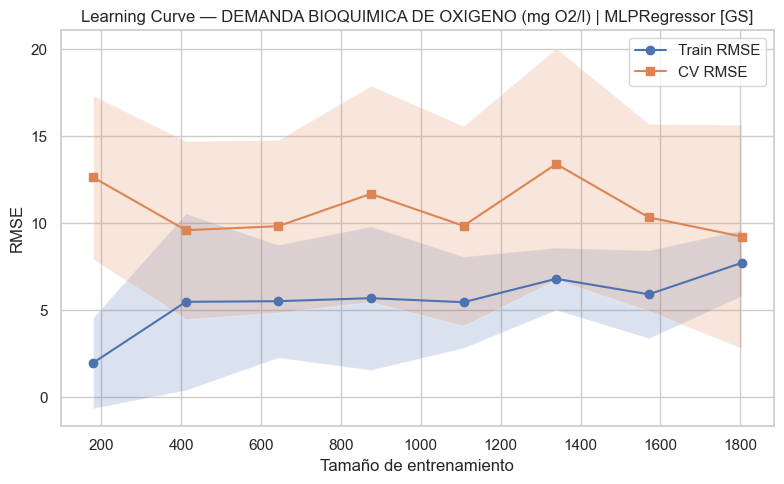

PermutationExplainer explainer: 301it [00:57,  4.56it/s]                         


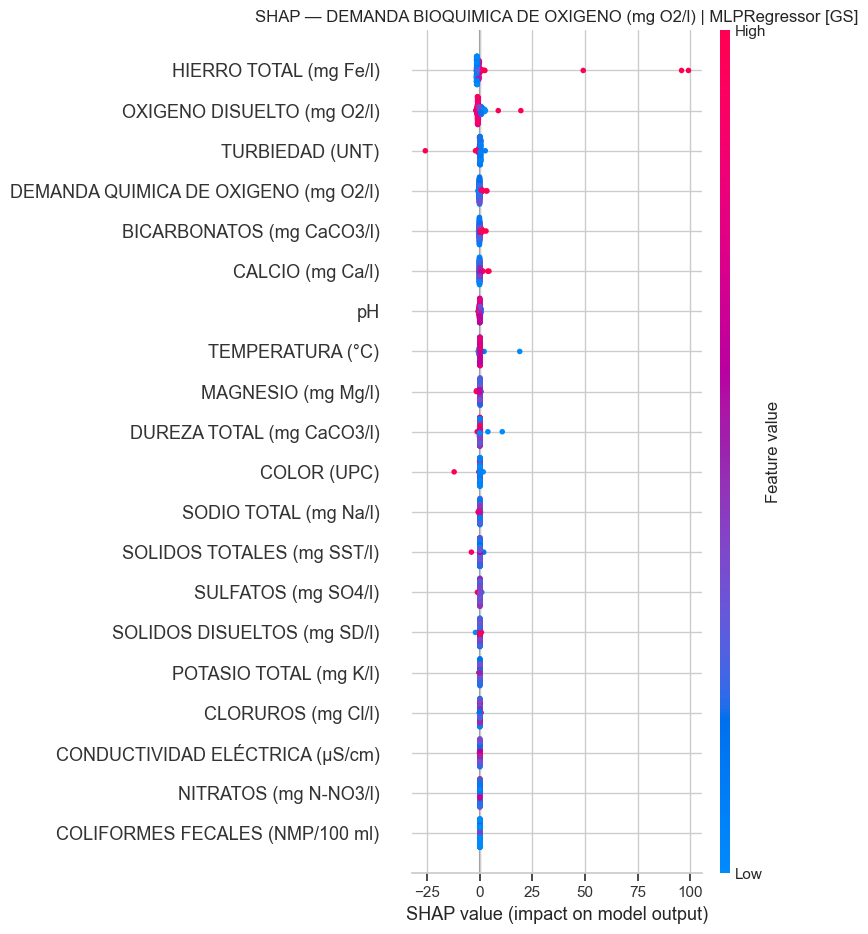

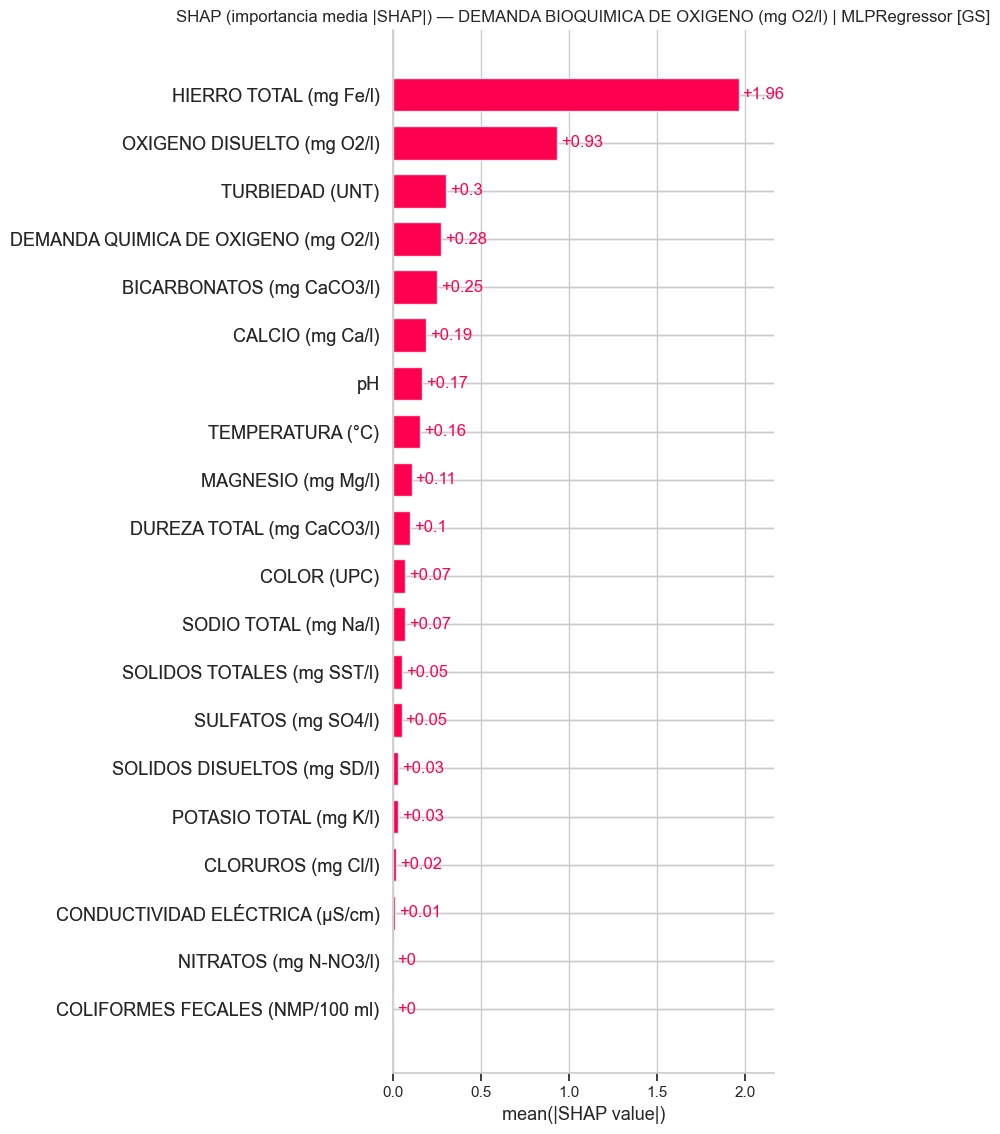

Top features (Permutation Importance):


,feature,imp_mean,imp_std
13,HIERRO TOTAL (mg Fe/l),9.777230e-01,1.601814e-01
7,OXIGENO DISUELTO (mg O2/l),3.818424e-02,3.643679e-02
3,TURBIEDAD (UNT),3.746537e-02,8.913215e-03
9,CALCIO (mg Ca/l),8.990053e-03,1.016040e-03
11,BICARBONATOS (mg CaCO3/l),8.705401e-03,3.167240e-03
6,DEMANDA QUIMICA DE OXIGENO (mg O2/l),8.668885e-03,1.291418e-03
2,COLOR (UPC),5.612481e-04,4.915297e-04
0,pH,2.762840e-04,9.009839e-04
17,CLORUROS (mg Cl/l),1.217249e-04,1.006726e-04
19,COLIFORMES FECALES (NMP/100 ml),-3.076344e-08,1.100306e-07


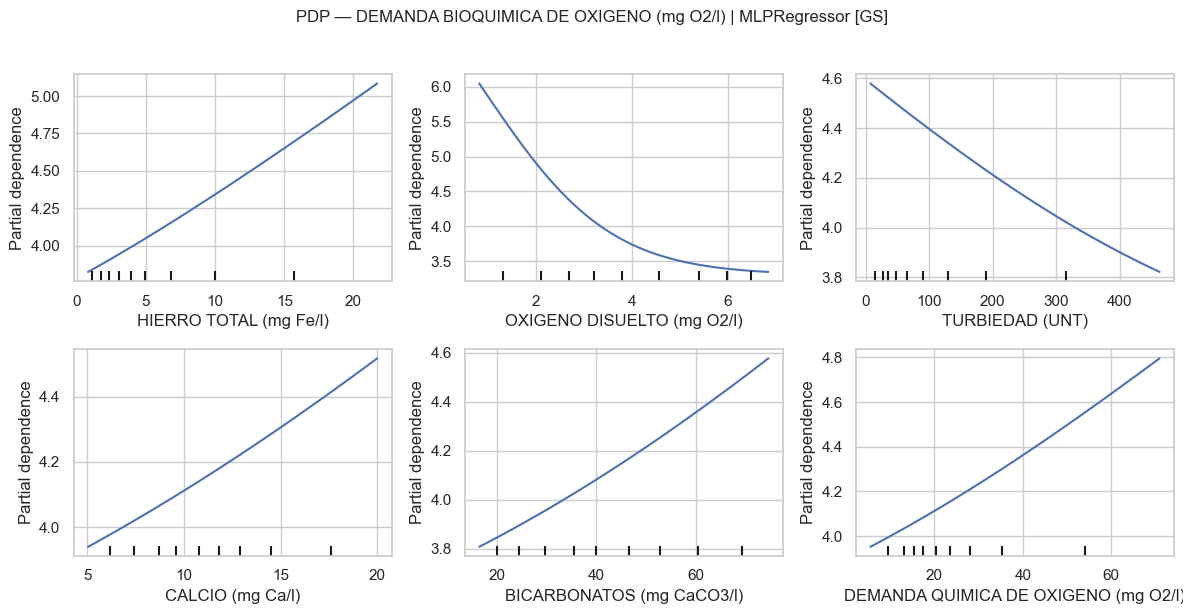


== Sensibilidad ±10% | DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) | MLPRegressor [GS] ==
R² : 0.916392  |  RMSE: 3.060389  |  MAE: 1.782587


,feature,abs_change_mean_+10,abs_change_mean_-10,rel_change_mean_%_+10,rel_change_mean_%_-10,rel_change_mean_%_avg
0,pH,0.368113,0.462806,-8.649378,10.874332,9.761855
7,OXIGENO DISUELTO (mg O2/l),0.126761,0.141408,-2.978453,3.322589,3.150521
1,TEMPERATURA (°C),0.077651,0.073555,1.824522,-1.728298,1.776410
11,BICARBONATOS (mg CaCO3/l),0.071512,0.070089,1.680286,-1.646850,1.663568
9,CALCIO (mg Ca/l),0.053185,0.051988,1.249671,-1.221529,1.235600
13,HIERRO TOTAL (mg Fe/l),0.048252,0.038260,1.133750,-0.898973,1.016362
6,DEMANDA QUIMICA DE OXIGENO (mg O2/l),0.039097,0.038895,0.918644,-0.913902,0.916273
10,MAGNESIO (mg Mg/l),0.022301,0.022710,-0.524003,0.533612,0.528807
3,TURBIEDAD (UNT),0.019735,0.020803,-0.463713,0.488796,0.476254
14,SODIO TOTAL (mg Na/l),0.015769,0.015903,-0.370513,0.373660,0.372087


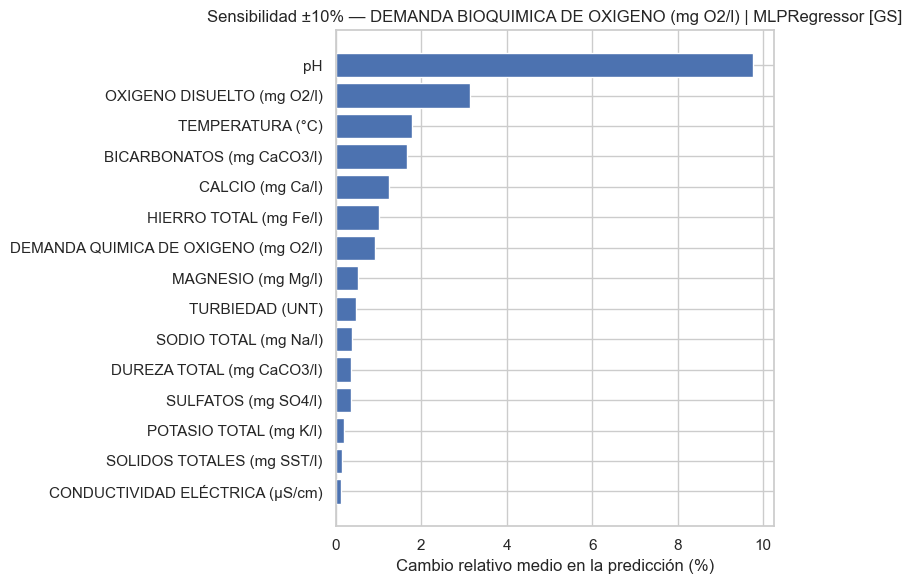


 ============ pH ============

Comparativa de candidatos para 'pH':


,modelo,R2,RMSE,MAE
5,XGBoost [Optuna],0.414973,0.295943,0.212037
9,XGBoost [GS],0.396003,0.300703,0.215615
2,RandomForest [Optuna],0.345196,0.313095,0.224340
8,RandomForest [GS],0.340332,0.314255,0.225020
10,SVR (RBF) [GS],0.301384,0.323400,0.237460
3,SVR (RBF) [Optuna],0.301326,0.323413,0.235958
11,MLPRegressor [GS],0.216275,0.342533,0.260508
0,LinearRegression [Optuna],0.189668,0.348299,0.262455
6,LinearRegression [GS],0.189668,0.348299,0.262455
4,MLPRegressor [Optuna],0.150839,0.356546,0.273303


Modelo ganador: XGBoost [Optuna]
R²  : 0.414973
RMSE: 0.295943
MAE : 0.212037


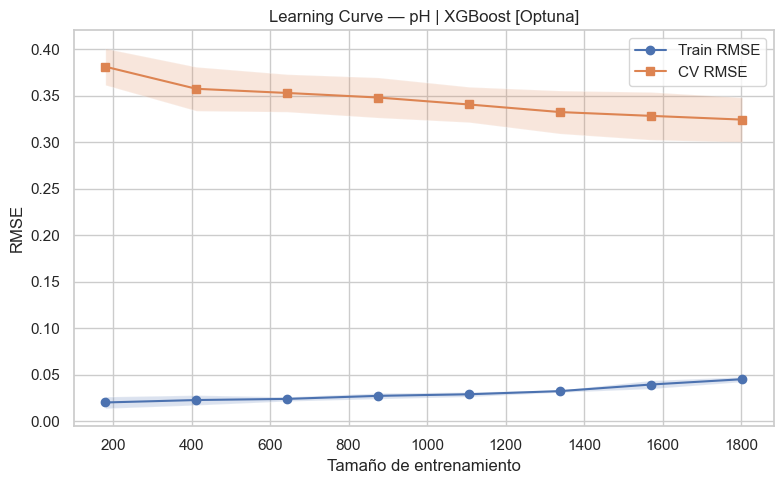

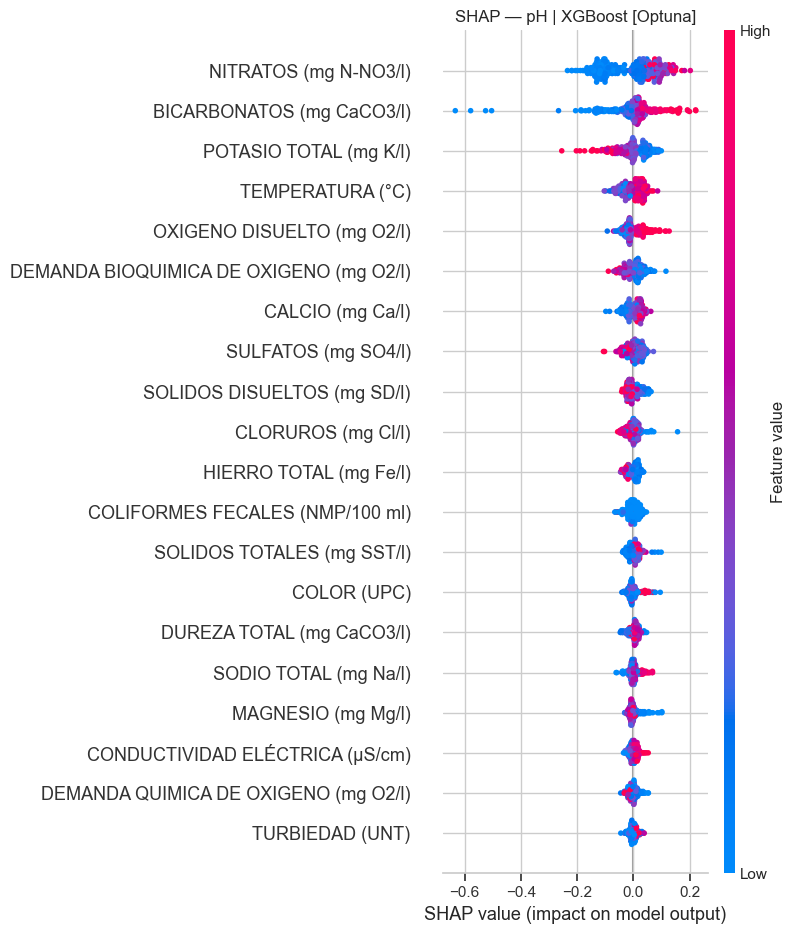

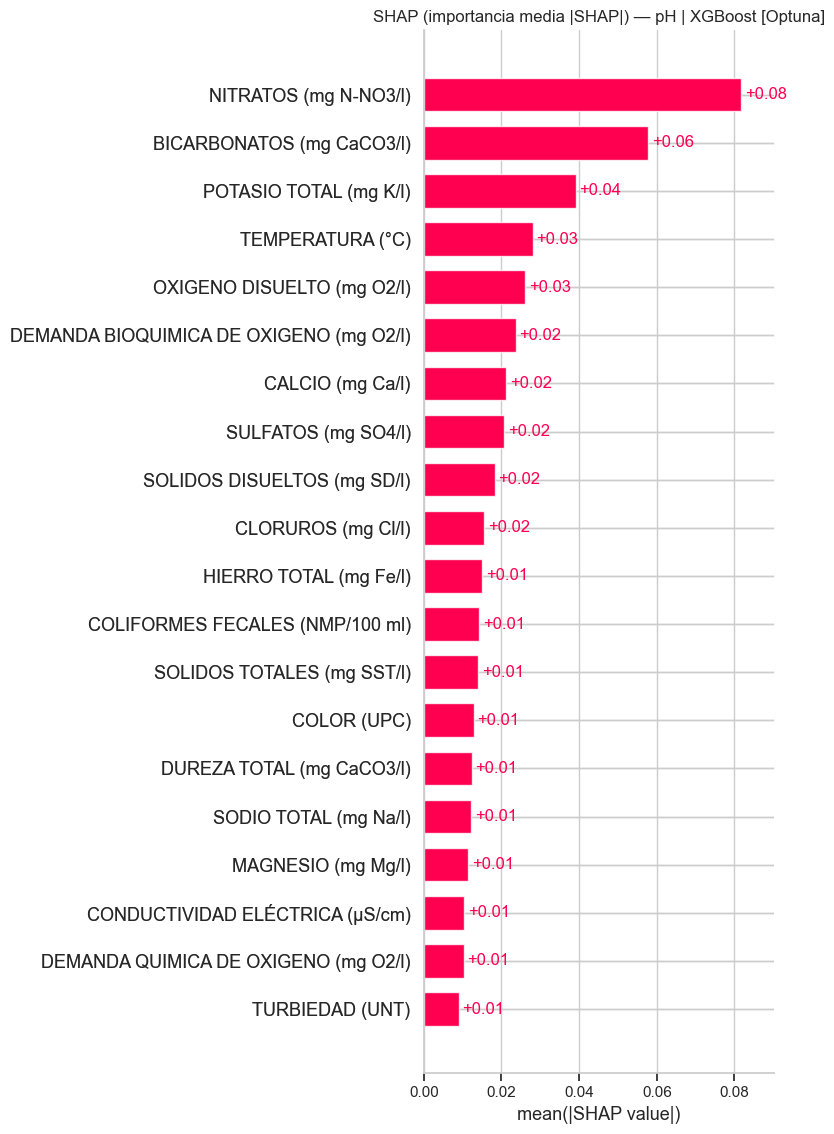

Top features (Permutation Importance):


,feature,imp_mean,imp_std
11,BICARBONATOS (mg CaCO3/l),0.221149,0.040060
16,NITRATOS (mg N-NO3/l),0.142236,0.019729
0,TEMPERATURA (°C),0.068924,0.007745
3,SOLIDOS TOTALES (mg SST/l),0.062352,0.013698
18,SULFATOS (mg SO4/l),0.044064,0.012462
7,OXIGENO DISUELTO (mg O2/l),0.042691,0.011848
17,CLORUROS (mg Cl/l),0.041464,0.008312
9,CALCIO (mg Ca/l),0.038760,0.011729
15,POTASIO TOTAL (mg K/l),0.037605,0.015250
2,TURBIEDAD (UNT),0.034016,0.006064


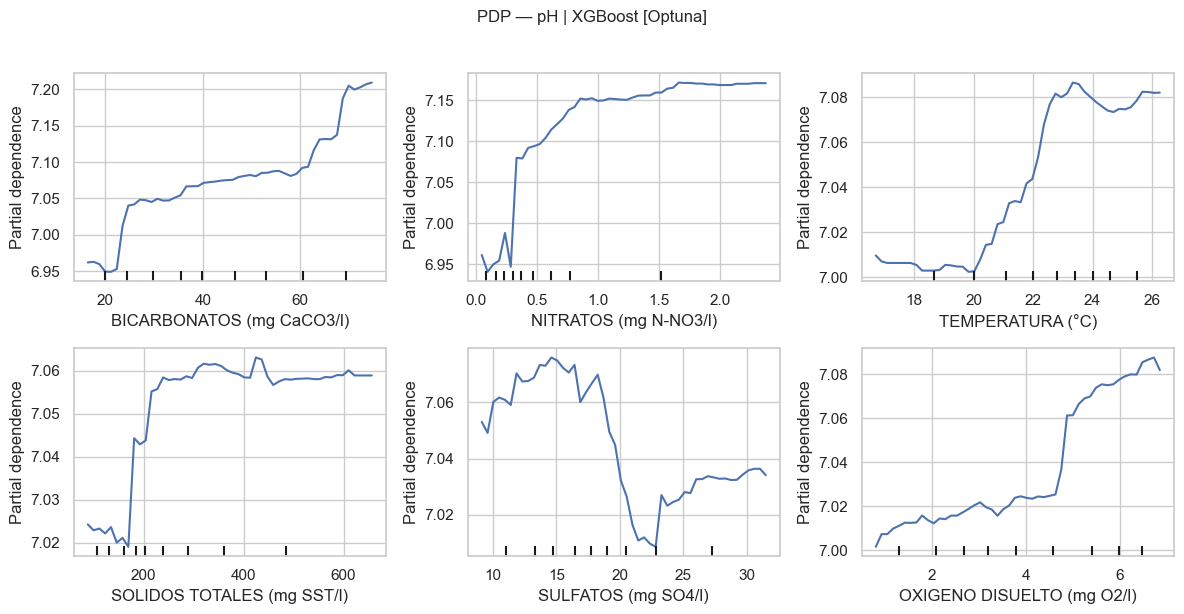


== Sensibilidad ±10% | pH | XGBoost [Optuna] ==
R² : 0.414973  |  RMSE: 0.295943  |  MAE: 0.212037


,feature,abs_change_mean_+10,abs_change_mean_-10,rel_change_mean_%_+10,rel_change_mean_%_-10,rel_change_mean_%_avg
0,TEMPERATURA (°C),0.016085,0.031486,0.228069,-0.446442,0.337255
11,BICARBONATOS (mg CaCO3/l),0.017128,0.016553,0.242869,-0.234708,0.238789
15,POTASIO TOTAL (mg K/l),0.013223,0.012231,-0.187488,0.173432,0.180460
7,OXIGENO DISUELTO (mg O2/l),0.009649,0.007941,0.136820,-0.112594,0.124707
16,NITRATOS (mg N-NO3/l),0.006621,0.010114,0.093879,-0.143405,0.118642
4,SOLIDOS DISUELTOS (mg SD/l),0.004322,0.006896,-0.061277,0.097780,0.079529
18,SULFATOS (mg SO4/l),0.005813,0.005199,-0.082426,0.073724,0.078075
9,CALCIO (mg Ca/l),0.003705,0.006189,0.052528,-0.087754,0.070141
5,DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),0.004460,0.005037,-0.063244,0.071425,0.067335
3,SOLIDOS TOTALES (mg SST/l),0.002998,0.003822,0.042514,-0.054198,0.048356


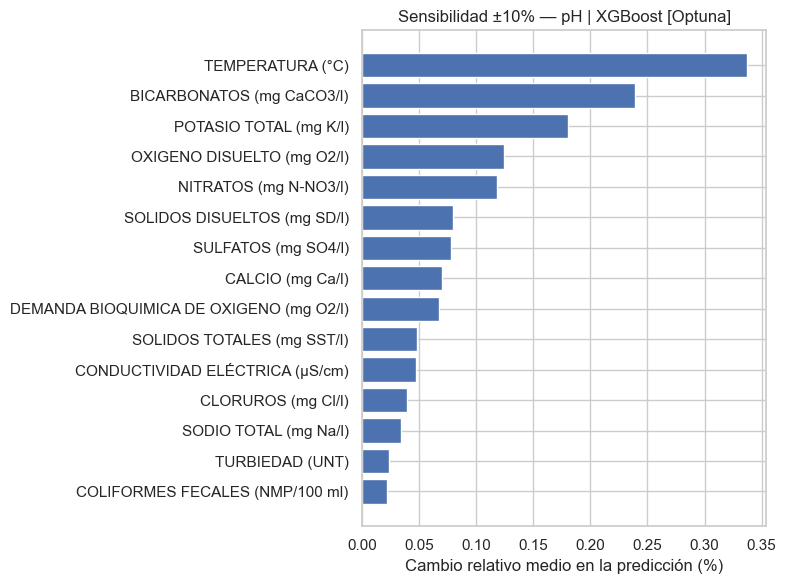

In [34]:
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid", font_scale=1.0)

from sklearn.base import clone
from sklearn.model_selection import KFold, train_test_split, learning_curve
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.inspection import permutation_importance, PartialDependenceDisplay

# Utilidades

def pick_best_model(y_col, X_train, X_test, y_train, y_test):
    """
    Recorre todos los modelos guardados (Optuna y/o GridSearch) para la variable y_col,
    los evalúa en el split dado y devuelve (name, fitted_model) del que tenga menor RMSE.
    """
    candidatos = {}

    # Candidatos de Optuna
    if 'best_models_optuna' in globals() and y_col in best_models_optuna:
        for name, est in best_models_optuna[y_col].items():
            candidatos[f"{name} [Optuna]"] = est

    # Candidatos de GridSearch
    if 'best_models_grid' in globals() and y_col in best_models_grid:
        for name, est in best_models_grid[y_col].items():
            key = f"{name} [GS]"
            if key not in candidatos:
                candidatos[key] = est

    if not candidatos:
        raise RuntimeError(f"No hay modelos guardados para '{y_col}'.")

    filas = []
    mejor_name, mejor_est, mejor_rmse = None, None, float("inf")

    for name, est in candidatos.items():
        model = clone(est)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        rmse = root_mean_squared_error(y_test, pred)
        mae  = mean_absolute_error(y_test, pred)
        r2   = r2_score(y_test, pred)
        filas.append({"modelo": name, "R2": r2, "RMSE": rmse, "MAE": mae})

        if rmse < mejor_rmse:
            mejor_rmse = rmse
            mejor_name = name
            mejor_est  = model

    print(f"\nComparativa de candidatos para '{y_col}':")
    display(pd.DataFrame(filas).sort_values("RMSE"))

    return mejor_name, mejor_est


def get_Xy_for_target(y_col):
    """Construye X,y alineados para el objetivo dado (quita la y de X si estuviera)."""
    assert y_col in df_imputed.columns
    X = df_vif_filtered.copy()
    if y_col in X.columns:
        X = X.drop(columns=[y_col])
    y = df_imputed.loc[X.index, y_col]
    return X, y


def plot_learning_curves(model, X, y, title):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    train_sizes, train_scores, val_scores = learning_curve(
        estimator=clone(model),
        X=X, y=y,
        cv=cv,
        scoring="neg_root_mean_squared_error",
        train_sizes=np.linspace(0.1, 1.0, 8),
        n_jobs=-1,
        shuffle=True,
        random_state=42
    )
    train_rmse = -train_scores
    val_rmse = -val_scores

    plt.figure(figsize=(8,5))
    plt.plot(train_sizes, train_rmse.mean(axis=1), marker="o", label="Train RMSE")
    plt.fill_between(train_sizes,
                     train_rmse.mean(axis=1)-train_rmse.std(axis=1),
                     train_rmse.mean(axis=1)+train_rmse.std(axis=1),
                     alpha=0.2)
    plt.plot(train_sizes, val_rmse.mean(axis=1), marker="s", label="CV RMSE")
    plt.fill_between(train_sizes,
                     val_rmse.mean(axis=1)-val_rmse.std(axis=1),
                     val_rmse.mean(axis=1)+val_rmse.std(axis=1),
                     alpha=0.2)
    plt.title(f"Learning Curve — {title}")
    plt.xlabel("Tamaño de entrenamiento")
    plt.ylabel("RMSE")
    plt.legend()
    plt.tight_layout()
    plt.show()


def shap_summary(model, X_train, X_test, title):
    """
    SHAP para varios tipos de modelo (árbol, lineal, pipeline/MLP/SVR).
    Muestra beeswarm y bar con muestreo para acelerar.
    """
    try:
        import shap
        # --- muestreo para rapidez ---
        n_bg = min(300, len(X_train))
        n_te = min(300, len(X_test))
        X_bg = X_train.sample(n_bg, random_state=42)
        X_te = X_test.sample(n_te, random_state=42)

        # Detectar árbol / lineal / otros
        from sklearn.pipeline import Pipeline
        from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
        from sklearn.svm import SVR
        from sklearn.tree import DecisionTreeRegressor
        from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

        # Si es pipeline, la "función" de predicción será el pipeline completo
        predict_fn = model.predict

        # Caso 1: modelos de árbol => TreeExplainer (rápido)
        final_est = model
        if isinstance(model, Pipeline):
            final_est = model.steps[-1][1]

        is_tree = isinstance(final_est, (DecisionTreeRegressor,
                                         RandomForestRegressor,
                                         GradientBoostingRegressor))
        # XGBoost si está
        try:
            from xgboost import XGBRegressor
            is_tree = is_tree or isinstance(final_est, XGBRegressor)
        except Exception:
            pass

        if is_tree:
            # Para pipelines con árbol, TreeExplainer puede aceptar el pipeline completo en versiones recientes,
            # pero si falla, usamos la función de predicción genérica.
            try:
                explainer = shap.TreeExplainer(final_est)
                # Para TreeExplainer hay que transformar X_te como entra al estimador final:
                X_te_trans = X_te if not isinstance(model, Pipeline) else model[:-1].transform(X_te)
                shap_values = explainer(X_te_trans)
            except Exception:
                explainer = shap.Explainer(predict_fn, X_bg)
                shap_values = explainer(X_te)

        # Caso 2: lineales => LinearExplainer
        elif isinstance(final_est, (LinearRegression, Ridge, Lasso, ElasticNet)):
            try:
                explainer = shap.LinearExplainer(model, X_bg)  # pipeline completo
                shap_values = explainer(X_te)
            except Exception:
                explainer = shap.Explainer(predict_fn, X_bg)
                shap_values = explainer(X_te)

        # Caso 3: otros (SVR, MLP, etc.) => función de predicción + Kernel/Auto
        else:
            # Explainer genérico partiendo de una función de predicción
            try:
                explainer = shap.Explainer(predict_fn, X_bg)  # auto elige Kernel
                shap_values = explainer(X_te)
            except Exception:
                # Fall-back explícito a KernelExplainer (más lento)
                kb = shap.sample(X_bg, min(100, len(X_bg)))
                explainer = shap.KernelExplainer(predict_fn, kb)
                shap_values = explainer.shap_values(X_te, nsamples=100)

        # --- Plots ---
        plt.figure(figsize=(8,5))
        shap.plots.beeswarm(shap_values, max_display=20, show=False)
        plt.title(f"SHAP — {title}")
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(8,5))
        shap.plots.bar(shap_values, max_display=20, show=False)
        plt.title(f"SHAP (importancia media |SHAP|) — {title}")
        plt.tight_layout()
        plt.show()

    except ImportError:
        print("Instala SHAP: pip install shap")
    except Exception as e:
        print(f"No se pudo calcular/plotear SHAP: {e}")


def top_features_via_permutation(model, X_test, y_test, k=6):
    perm = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
    df_pi = pd.DataFrame({
        "feature": X_test.columns,
        "imp_mean": perm.importances_mean,
        "imp_std": perm.importances_std
    }).sort_values("imp_mean", ascending=False)
    return df_pi, df_pi["feature"].head(k).tolist()


def pdp_plots(model, X, top_vars, title):
    if not top_vars:
        return
    n = len(top_vars)
    ncols = 3
    nrows = int(np.ceil(n / ncols))
    fig, ax = plt.subplots(nrows, ncols, figsize=(4*ncols, 3*nrows))
    ax = np.array(ax).reshape(-1)
    for i, feat in enumerate(top_vars):
        try:
            PartialDependenceDisplay.from_estimator(
                model, X, [feat], ax=ax[i], kind="average", grid_resolution=50
            )
        except Exception as e:
            ax[i].set_title(f"PDP {feat} (error)")
            ax[i].text(0.5, 0.5, str(e), ha="center")
    for j in range(i+1, len(ax)):
        fig.delaxes(ax[j])
    fig.suptitle(f"PDP — {title}", y=1.02, fontsize=12)
    plt.tight_layout()
    plt.show()


def sensitivity_plus_minus_10(model, X_test, y_test, title, rel=True):
    base_pred = model.predict(X_test)
    base_mean = np.mean(base_pred)

    rows = []
    Xc = X_test.copy()

    for feat in Xc.columns:
        s = pd.to_numeric(Xc[feat], errors="coerce")
        if not np.isfinite(s).any():
            continue

        Xp = Xc.copy(); Xp[feat] = s * 1.10
        pred_p = model.predict(Xp)
        delta_p = np.mean(pred_p) - base_mean

        Xm = Xc.copy(); Xm[feat] = s * 0.90
        pred_m = model.predict(Xm)
        delta_m = np.mean(pred_m) - base_mean

        if rel and abs(base_mean) > 1e-12:
            rel_p = 100 * delta_p / base_mean
            rel_m = 100 * delta_m / base_mean
            rel_avg = (abs(rel_p) + abs(rel_m)) / 2.0
            rows.append([feat, abs(delta_p), abs(delta_m), rel_p, rel_m, rel_avg])
        else:
            rows.append([feat, abs(delta_p), abs(delta_m), np.nan, np.nan, np.nan])

    cols = ["feature", "abs_change_mean_+10", "abs_change_mean_-10",
            "rel_change_mean_%_+10", "rel_change_mean_%_-10", "rel_change_mean_%_avg"]
    df_sens = pd.DataFrame(rows, columns=cols).sort_values(
        "rel_change_mean_%_avg", ascending=False
    )

    print(f"\n== Sensibilidad ±10% | {title} ==")
    print(f"R² : {r2_score(y_test, base_pred):.6f}  |  RMSE: {root_mean_squared_error(y_test, base_pred):.6f}  |  MAE: {mean_absolute_error(y_test, base_pred):.6f}")
    display(df_sens.head(15))

    top = df_sens.head(15).iloc[::-1]
    plt.figure(figsize=(8,6))
    plt.barh(top["feature"], top["rel_change_mean_%_avg"])
    plt.xlabel("Cambio relativo medio en la predicción (%)")
    plt.title(f"Sensibilidad ±10% — {title}")
    plt.tight_layout()
    plt.show()

    return df_sens


# EJECUCIÓN PARA CADA OBJETIVO

for y_col in objetivos:   # usa 'objetivos'
    print("\n", "="*12, y_col, "="*12)

    X_all, y_all = get_Xy_for_target(y_col)
    X_train, X_test, y_train, y_test = train_test_split(
        X_all, y_all, test_size=0.2, random_state=42
    )

    # ahora sí elige el mejor según RMSE real
    model_name, model = pick_best_model(y_col, X_train, X_test, y_train, y_test)

    y_pred = model.predict(X_test)
    print(f"Modelo ganador: {model_name}")
    print(f"R²  : {r2_score(y_test, y_pred):.6f}")
    print(f"RMSE: {root_mean_squared_error(y_test, y_pred):.6f}")
    print(f"MAE : {mean_absolute_error(y_test, y_pred):.6f}")

    # 1) Learning curves
    plot_learning_curves(model, X_all, y_all, title=f"{y_col} | {model_name}")

    # 2) SHAP
    shap_summary(model, X_train, X_test, title=f"{y_col} | {model_name}")

    # 3) PDP sobre top features
    df_pi, top_vars = top_features_via_permutation(model, X_test, y_test, k=6)
    print("Top features (Permutation Importance):")
    display(df_pi.head(10))
    pdp_plots(model, X_test, top_vars, title=f"{y_col} | {model_name}")

    # 4) Sensibilidad ±10%
    _ = sensitivity_plus_minus_10(model, X_test, y_test, title=f"{y_col} | {model_name}", rel=True)